# PARTE 1

## Calculation of financial variables and ratios

En esta sección se busca calcular variables financieros y radios significativos.

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:

import pandas as pd
import numpy as np

%cd "/content/gdrive/MyDrive/IA avanzada/M1-Estadística/Reto"
data = pd.read_csv('dataus2024.csv')
data.shape

/content/gdrive/MyDrive/IA avanzada/M1-Estadística/Reto


(557181, 24)

In [ ]:
firms = pd.read_csv('firmsus2024.csv')
firms.shape

(5689, 7)

In [ ]:
firms1 = firms[['empresa', 'Nombre', 'status', "naics1"]]
firms1.columns = ['firm', 'Empresa', 'status', 'industria']
data = pd.merge(data, firms1, on='firm', how='left')
data.shape
data.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'cto', 'fiscalq', 'Empresa', 'status',
       'industria'],
      dtype='object')

## Calculo de columna de net income y otras asociadas:

Utilidad operativa antes de impuesto = EBIT

Utilidad bruta = GROSS PROFIT= Revenue - Cost of good sold (COGS)

EBIT = GROSS PROFIT - SGAE

NET INCOME =  EBIT - FINEXP - INCOMETAX + OTHERINCOME + EXTRAORDINARY INCOMES


In [ ]:
data['GROSSPROFIT'] = data['revenue'] - data['cogs']
data['EBIT'] = data['GROSSPROFIT'] - data['sgae']
data['NETINCOME'] = data['EBIT'] - data['finexp'] - data['incometax'] + data['otherincome'] + data['extraordinaryitems']
data['EBT'] = data['EBIT'] - data['finexp'] + data['otherincome'] + data['extraordinaryitems']

## Cálculo de valor de mercado y valor en libros

Valor de mercado = MARKET VALUE = originalprice * sharesoutstanding
originalprice = precio original de la acción
shareoutstanding = # de acciones disponibles

Valor en libros = BOOK VALUE = totalassets - totalliabilities
totalassets = total de activos
totalliabilities = total de pasivos

In [ ]:
data['MARKETVALUE'] = data['originalprice'] * data['sharesoutstanding']
data['BOOKVALUE'] = data['totalassets'] - data['totalliabilities']

## Cálculo de variables de control

Las variables de control son variables independientes que tienen mucha correlación con la variable dependiente.

Book to market ratio es una variable de control.

Earnings se puede medir con alguna variable de utilidad como NETINCOME, EBIT.

Earnings per share deflated by price = EPS / originalprice


In [ ]:
data['BOOKTOMARKET'] = data['BOOKVALUE'] / data['MARKETVALUE']
data['EPS'] = data['EBIT'] / data['sharesoutstanding']
data['EPSP'] = data['EPS'] / data['originalprice']


## Cálculo de retornos de acción

Retornos simples:

Retorno trimestral = QR = (adjprice / adjprice[t-1] - 1)
Retorno anual = YR = (adjprice / adjprice[t-4] - 1)

Retornos Continuos Compuestos:

ret triemestral = qr = log(adjprice) - log(adjprice[t-1])
ret anual = yr = log(adjprice) - log(adjprice[t-1])

Índice en el dataset por firm-quarter

In [ ]:
data['qdate'] = pd.PeriodIndex(data.q, freq='Q')
data.set_index(['firm', 'qdate'], inplace=True)
data.head()
data.index

MultiIndex([(     'A', '2000Q1'),
            (     'A', '2000Q2'),
            (     'A', '2000Q3'),
            (     'A', '2000Q4'),
            (     'A', '2001Q1'),
            (     'A', '2001Q2'),
            (     'A', '2001Q3'),
            (     'A', '2001Q4'),
            (     'A', '2002Q1'),
            (     'A', '2002Q2'),
            ...
            ('ZY_old', '2022Q1'),
            ('ZY_old', '2022Q2'),
            ('ZY_old', '2022Q3'),
            ('ZY_old', '2022Q4'),
            ('ZY_old', '2023Q1'),
            ('ZY_old', '2023Q2'),
            ('ZY_old', '2023Q3'),
            ('ZY_old', '2023Q4'),
            ('ZY_old', '2024Q1'),
            ('ZY_old', '2024Q2')],
           names=['firm', 'qdate'], length=557181)

In [ ]:
data['QR'] = (data['adjprice'] / data.groupby(['firm'])['adjprice'].shift(1) - 1)
data['YR'] = (data['adjprice'] / data.groupby(['firm'])['adjprice'].shift(4) - 1)
data.head(200)

q  fiscalmonth     revenue       cogs       sgae  \
firm     qdate                                                           
A        2000Q1  2000q1          NaN         NaN        NaN        NaN   
         2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
         2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
         2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
         2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
...                 ...          ...         ...        ...        ...   
AA       2024Q2  2024q2          6.0   5505000.0  4937000.0   697000.0   
AABA_old 2000Q1  2000q1          3.0    228384.0    34467.0   119051.0   
         2000Q2  2000q2          6.0    498500.0    73796.0   256947.0   
         2000Q3  2000q3          9.0    799305.0   116105.0   472842.0   
         2000Q4  2000q4         12.0   1110178.0   158419.0   653939.0   

                 otherincome  extraordinaryitems   finexp  incometax  \
firm     qdate                                                         
A        2000Q1          NaN                 NaN      NaN        NaN   
         2000Q2      73000.0                 0.0      0.0   161000.0   
         2000Q3     101000.0                 0.0      0.0   244000.0   
         2000Q4     111000.0                 0.0      0.0   407000.0   
         2001Q1      19000.0            -25000.0      0.0   119000.0   
...                      ...                 ...      ...        ...   
AA       2024Q2     -37000.0             44000.0  67000.0    43000.0   
AABA_old 2000Q1          0.0             54886.0      0.0    51901.0   
         2000Q2          0.0             71093.0      0.0    95540.0   
         2000Q3          0.0             99379.0      0.0   141142.0   
         2000Q4     -33701.0             -5298.0      0.0   188045.0   

                 totalassets  ...       EBIT  NETINCOME        EBT  \
firm     qdate                ...                                    
A        2000Q1          NaN  ...        NaN        NaN        NaN   
         2000Q2    7321000.0  ...   385000.0   297000.0   458000.0   
         2000Q3    7827000.0  ...   595000.0   452000.0   696000.0   
         2000Q4    8425000.0  ...  1053000.0   757000.0  1164000.0   
         2001Q1    9208000.0  ...   279000.0   154000.0   273000.0   
...                      ...  ...        ...        ...        ...   
AA       2024Q2   14307000.0  ...  -129000.0  -232000.0  -189000.0   
AABA_old 2000Q1    1893033.0  ...    74866.0    77851.0   129752.0   
         2000Q2    2037987.0  ...   167757.0   143310.0   238850.0   
         2000Q3    2309830.0  ...   210358.0   168595.0   309737.0   
         2000Q4    2269576.0  ...   297820.0    70776.0   258821.0   

                  MARKETVALUE  BOOKVALUE  BOOKTOMARKET       EPS      EPSP  \
firm     qdate                                                               
A        2000Q1  4.700800e+07        NaN           NaN       NaN       NaN   
         2000Q2  3.335506e+07  4642000.0      0.139169  0.851258  0.011542   
         2000Q3  2.216940e+07  4902000.0      0.221116  1.313424  0.026839   
         2000Q4  2.498606e+07  5265000.0      0.210718  2.307357  0.042144   
         2001Q1  1.403653e+07  5541000.0      0.394756  0.610811  0.019877   
...                       ...        ...           ...       ...       ...   
AA       2024Q2  7.142884e+06  5416000.0      0.758237 -0.718424 -0.018060   
AABA_old 2000Q1  9.195820e+07  1646664.0      0.017907  0.139522  0.000814   
         2000Q2  6.804912e+07  1756999.0      0.025820  0.305381  0.002465   
         2000Q3  5.081647e+07  1943466.0      0.038245  0.376700  0.004140   
         2000Q4  1.678758e+07  1926227.0      0.114741  0.533324  0.017740   

                       QR        YR  
firm     qdate                       
A        2000Q1       NaN       NaN  
         2000Q2 -0.290865       NaN  
         2000Q3 -0.336441       NaN  
      

In [ ]:
data['qr'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))
data['yr'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

## Cálculo de retornos futuros

La variable de interés en el modelo es el retorno anual futuro. Para ello, se crea una columna con el valor del periodo siguiente.

In [ ]:
data['f1yr'] = data.groupby(['firm'])['yr'].shift(-1)

In [ ]:
data

q  fiscalmonth     revenue       cogs       sgae  \
firm   qdate                                                           
A      2000Q1  2000q1          NaN         NaN        NaN        NaN   
       2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
       2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
       2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
       2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
...               ...          ...         ...        ...        ...   
ZY_old 2023Q2  2023q2          NaN         NaN        NaN        NaN   
       2023Q3  2023q3          NaN         NaN        NaN        NaN   
       2023Q4  2023q4          NaN         NaN        NaN        NaN   
       2024Q1  2024q1          NaN         NaN        NaN        NaN   
       2024Q2  2024q2          NaN         NaN        NaN        NaN   

               otherincome  extraordinaryitems  finexp  incometax  \
firm   qdate                                                        
A      2000Q1          NaN                 NaN     NaN        NaN   
       2000Q2      73000.0                 0.0     0.0   161000.0   
       2000Q3     101000.0                 0.0     0.0   244000.0   
       2000Q4     111000.0                 0.0     0.0   407000.0   
       2001Q1      19000.0            -25000.0     0.0   119000.0   
...                    ...                 ...     ...        ...   
ZY_old 2023Q2          NaN                 NaN     NaN        NaN   
       2023Q3          NaN                 NaN     NaN        NaN   
       2023Q4          NaN                 NaN     NaN        NaN   
       2024Q1          NaN                 NaN     NaN        NaN   
       2024Q2          NaN                 NaN     NaN        NaN   

               totalassets  ...   MARKETVALUE  BOOKVALUE  BOOKTOMARKET  \
firm   qdate                ...                                          
A      2000Q1          NaN  ...  4.700800e+07        NaN           NaN   
       2000Q2    7321000.0  ...  3.335506e+07  4642000.0      0.139169   
       2000Q3    7827000.0  ...  2.216940e+07  4902000.0      0.221116   
       2000Q4    8425000.0  ...  2.498606e+07  5265000.0      0.210718   
       2001Q1    9208000.0  ...  1.403653e+07  5541000.0      0.394756   
...                    ...  ...           ...        ...           ...   
ZY_old 2023Q2          NaN  ...           NaN        NaN           NaN   
       2023Q3          NaN  ...           NaN        NaN           NaN   
       2023Q4          NaN  ...           NaN        NaN           NaN   
       2024Q1          NaN  ...           NaN        NaN           NaN   
       2024Q2          NaN  ...           NaN        NaN           NaN   

                    EPS      EPSP        QR        YR        qr        yr  \
firm   qdate                                                                
A      2000Q1       NaN       NaN       NaN       NaN       NaN       NaN   
       2000Q2  0.851258  0.011542 -0.290865       NaN -0.343710       NaN   
       2000Q3  1.313424  0.026839 -0.336441       NaN -0.410137       NaN   
       2000Q4  2.307357  0.042144  0.118774       NaN  0.112233       NaN   
       2001Q1  0.610811  0.019877 -0.438721 -0.704519 -0.577538 -1.219152   
...                 ...       ...       ...       ...       ...       ...   
ZY_old 2023Q2       NaN       NaN       NaN       NaN       NaN       NaN   
       2023Q3       NaN       NaN       NaN       NaN       NaN       NaN   
       2023Q4       NaN       NaN       NaN       NaN       NaN       NaN   
       2024Q1       NaN       NaN       NaN       NaN       NaN       NaN   
       2024Q2       NaN       NaN       NaN       NaN       NaN       NaN   

                   f1yr  
firm   qdate             
A      2000Q1       NaN  
       2000Q2       NaN  
       2000Q3       NaN  
       2000Q4 -1.219152  
       2001Q1 -0.819441  
...                 ...  
ZY_old 2023Q

## Cálculo de Return on Assets

Return on assets = ROA = netincome / totalassets


Es una medida del retorno de una empresa con respecto a sus assets.

In [ ]:
data['ROA'] = data['NETINCOME'] / data['totalassets']

## Cálculo de Gross Margin

GROSS MARGIN = GROSSPROFIT / revenue

Es una medida que compara el gross profit contra el revenue de una empresa. Es una medida de qué tanto dinero gana una empresa después de pagar sus costos de producción.

In [ ]:
data['GROSSMARGIN'] = data['GROSSPROFIT'] / data['revenue']

## Cálculo de Net Profit Margin

NET PROFIT MARGIN = netincome / revenue

Es una medida que compara los ingresos netos contra las ganancias.

In [ ]:
data['NETPROFITMARGIN'] = data['NETINCOME'] / data['revenue']

## Cálculo de Interest burden

INTEREST BURDEN = earnings before tax / earnings before interest and tax

Es una medida del impacto que tiene el pago de intereses en una empresa.

In [ ]:
data['INTERESTBURDEN'] = data['EBT'] / data['EBIT']

## Firm Composition of the US financial market

En esta sección se busca analizar la composición del mercado financiero.

Obtener los datos del quarter más reciente

In [ ]:
most_recent_quarter = data.index.get_level_values('qdate').max()
recent_data = data.loc[(slice(None), most_recent_quarter), :]
recent_data

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,EPSP,QR,YR,qr,yr,f1yr,ROA,GROSSMARGIN,NETPROFITMARGIN,INTERESTBURDEN
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2024Q2,2024q2,6.0,3231000.0,1467000.0,1017000.0,35000.0,0.0,5000.0,121000.0,10856000.0,...,0.019751,-0.107686,0.083762,-0.113937,0.080439,NaN,0.060427,0.545961,0.203033,1.040161
AA,2024Q2,2024q2,6.0,5505000.0,4937000.0,697000.0,-37000.0,44000.0,67000.0,43000.0,14307000.0,...,-0.018060,0.180134,0.188064,0.165628,0.172325,NaN,-0.016216,0.103179,-0.042144,1.465116
AABA_old,2024Q2,2024q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAC_old,2024Q2,2024q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAIC_old,2024Q2,2024q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,2024Q2,2024q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.422906,-0.843341,-0.549750,-1.853684,NaN,NaN,NaN,NaN,NaN
ZVO_old,2024Q2,2024q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZWS,2024Q2,2024q2,6.0,785800.0,429400.0,231300.0,-3000.0,1000.0,17300.0,25500.0,2681500.0,...,0.024639,-0.119424,0.104433,-0.127179,0.099332,NaN,0.029946,0.453551,0.102189,0.845723


In [ ]:
data['status']

firm    qdate 
A       2000Q1       activo
        2000Q2       activo
        2000Q3       activo
        2000Q4       activo
        2001Q1       activo
                    ...    
ZY_old  2023Q2    cancelado
        2023Q3    cancelado
        2023Q4    cancelado
        2024Q1    cancelado
        2024Q2    cancelado
Name: status, Length: 557181, dtype: object

In [ ]:
active_firms = recent_data[recent_data['status'] == 'activo'].groupby('industria').size()
active_firms

,0
industria,
-,2
"Agricultura, ganadería, aprovechamiento forestal, pesca y caza",17
Comercio al por mayor,74
Comercio al por menor,141
Construcción,47
"Empresas de electricidad, gas y agua",78
Industrias manufactureras,1499
Información en medios masivos,243
"Minería, explotación de canteras y extracción de petróleo y gas",109


Análisis de book value y market value

In [ ]:
industry_stats = recent_data.groupby('industria')[['BOOKVALUE', 'MARKETVALUE']].describe()
print("\nStatistics about book value and market value by industry:\n", industry_stats)


Statistics about book value and market value by industry:
                                                    BOOKVALUE                \
                                                       count          mean   
industria                                                                    
-                                                        0.0           NaN   
Agricultura, ganadería, aprovechamiento foresta...      10.0  4.841963e+06   
Comercio al por mayor                                   36.0  1.874937e+06   
Comercio al por menor                                   90.0  5.488150e+06   
Construcción                                            32.0  3.871633e+06   
Corporativos                                             0.0           NaN   
Empresas de electricidad, gas y agua                    46.0  1.032190e+07   
Industrias manufactureras                              480.0  5.467053e+06   
Información en medios masivos                          105.0  8.631934e+06   
Mine

Tanto el book value como el market value varían en cada industria, y tienen una relación que no parece ser lineal. Por ejemplo, la industria de servicios de alojamiento temporal tiene un book value promedio alto comparado con las demás industrias, pero su market value promedio se encuentra entre los más bajos.

Como ejemplo, se pueden analizar los promedios de la industira de transportes, correos y almacenamiento. Su book value promedio es de 5.73 millones de dólares, mientras que su market value es 13.9 millones de dólares. Eso signica que las empresas venden sus acciones en promedio a más de dos veces el valor calculado de la empresa.

## Distribución de firm size en market value

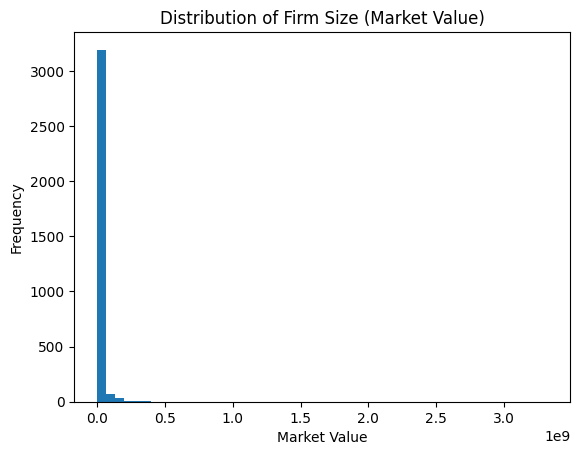

In [ ]:
import matplotlib.pyplot as plt
plt.hist(recent_data['MARKETVALUE'], bins=50)
plt.xlabel('Market Value')
plt.ylabel('Frequency')
plt.title('Distribution of Firm Size (Market Value)')
plt.show()

Se puede apreciar una distribución sesgada a la izquierda. La mayoría de las empresas se encuentran un rango muy bajo de market value de alrededor de 0.1, mientras que muy pocas se encuentran en valores superiores a este, siendo el máximo alrededor de 0.4

## Top 10 empresas más grandes por market value

In [ ]:
top_10_market_value = recent_data.nlargest(10, 'MARKETVALUE')
print("\nTop 10 firms by market value:\n", top_10_market_value[['Empresa', 'MARKETVALUE']])

typical_market_size = recent_data['MARKETVALUE'].median()
print("\nTypical market size of a US firm:", typical_market_size)


Top 10 firms by market value:
                             Empresa   MARKETVALUE
firm  qdate                                      
MSFT  2024Q2         Microsoft Corp  3.321869e+09
AAPL  2024Q2              Apple Inc  3.229664e+09
NVDA  2024Q2            Nvidia Corp  3.039084e+09
GOOGL 2024Q2           Alphabet Inc  2.251010e+09
AMZN  2024Q2        Amazon.Com, Inc  2.011081e+09
META  2024Q2    Meta Platforms, Inc  1.278971e+09
LLY   2024Q2  Eli Lilly And Company  8.604780e+08
AVGO  2024Q2           Broadcom Inc  7.473555e+08
TSLA  2024Q2             Tesla, Inc  6.310781e+08
JPM   2024Q2    Jpmorgan Chase & Co  5.754630e+08

Typical market size of a US firm: 1233298.7408999999


La empresa típica tiene un valor de alrededor de 1 millón de dólares, mientras que las empresas más grandes se encuentran en el orden de los miles de millones de dólares.

Top 10 empresas más grandes por book value

In [ ]:
top_10_market_value = recent_data.nlargest(10, 'BOOKVALUE')
print("\nTop 10 firms by book value:\n", top_10_market_value[['Empresa', 'BOOKVALUE']])

typical_market_size = recent_data['BOOKVALUE'].median()
print("\nTypical market size of a US firm:", typical_market_size)


Top 10 firms by book value:
                                    Empresa    BOOKVALUE
firm  qdate                                            
JPM   2024Q2           Jpmorgan Chase & Co  340552000.0
GOOGL 2024Q2                  Alphabet Inc  300753000.0
BAC   2024Q2          Bank Of America Corp  293892000.0
MSFT  2024Q2                Microsoft Corp  268477000.0
AMZN  2024Q2               Amazon.Com, Inc  236447000.0
C     2024Q2                 Citigroup Inc  209144000.0
WFC   2024Q2         Wells Fargo & Company  178148000.0
META  2024Q2           Meta Platforms, Inc  156763000.0
INTC  2024Q2                    Intel Corp  120434000.0
GS    2024Q2  The Goldman Sachs Group, Inc  119463000.0

Typical market size of a US firm: 1431247.0


La empresa típica tiene un valor de alrededor de 1 millón de dólares, mientras que las más grandes se encuentran en el orden de los cientos de millones de dólares.

## Evolution of the US financial market

En esta sección se analiza la evolución de el mercado financiero en Estados Unidos.

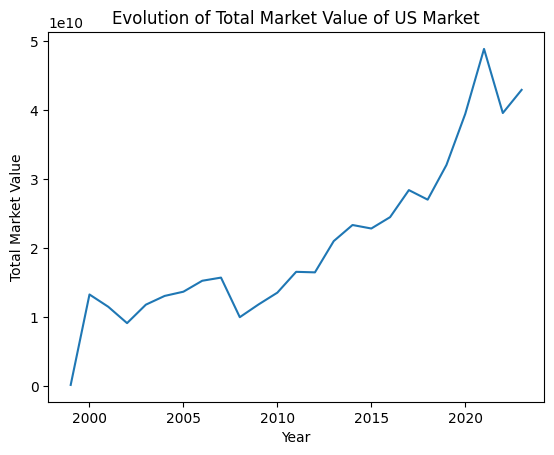

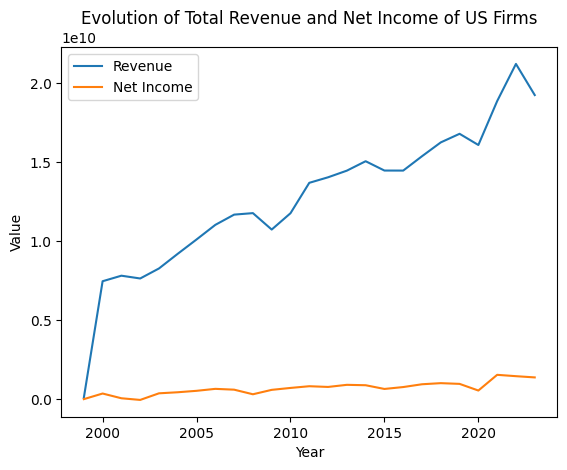

         MARKETVALUE       revenue     NETINCOME
yearf                                           
1999.0  2.120570e+08  9.087398e+07  5.573097e+06
2000.0  1.330257e+10  7.457905e+09  3.604507e+08
2001.0  1.152204e+10  7.807537e+09  6.081797e+07
2002.0  9.155828e+09  7.631766e+09 -4.390388e+07
2003.0  1.182696e+10  8.264584e+09  3.736873e+08
2004.0  1.309294e+10  9.192793e+09  4.408524e+08
2005.0  1.370635e+10  1.009716e+10  5.314932e+08
2006.0  1.528800e+10  1.102089e+10  6.554135e+08
2007.0  1.574501e+10  1.166740e+10  6.043789e+08
2008.0  1.001692e+10  1.176212e+10  3.133322e+08
2009.0  1.186277e+10  1.072391e+10  5.922775e+08
2010.0  1.356921e+10  1.175571e+10  7.136607e+08
2011.0  1.658158e+10  1.367720e+10  8.218364e+08
2012.0  1.650406e+10  1.402711e+10  7.765565e+08
2013.0  2.102836e+10  1.444657e+10  9.098735e+08
2014.0  2.335853e+10  1.504250e+10  8.846443e+08
2015.0  2.285191e+10  1.445347e+10  6.495996e+08
2016.0  2.449701e+10  1.445110e+10  7.694228e+08
2017.0  2.841072e+10

In [ ]:
# Filter data for fiscal month 12 (annual data)
annual_data = data[data['fiscalmonth'] == 12]
annual_data = annual_data[annual_data.index.get_level_values('qdate').year != 2024]

# Calculate total market value, revenue, and net income per year
yearly_stats = annual_data.groupby('yearf')[['MARKETVALUE', 'revenue', 'NETINCOME']].sum()

# Plot the evolution of total market value over the years
plt.plot(yearly_stats.index, yearly_stats['MARKETVALUE'])
plt.xlabel('Year')
plt.ylabel('Total Market Value')
plt.title('Evolution of Total Market Value of US Market')
plt.show()

# Plot the evolution of total revenue and net income over the years
plt.plot(yearly_stats.index, yearly_stats['revenue'], label='Revenue')
plt.plot(yearly_stats.index, yearly_stats['NETINCOME'], label='Net Income')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Evolution of Total Revenue and Net Income of US Firms')
plt.legend()
plt.show()

# Display the yearly statistics table
print(yearly_stats)


El valor de mercado ha tenido un crecimiento constante y alto, con ciertos picos negativos en momentos históricos como la crisis del 2008 y la pandemia de 2020.
El revenue ha tenido un comportamiento muy similar.
Sin embargo, los ingesos netos han tenido un crecimiento mucho menos acelerado en comparación con las otras dos variables, además de que no sigue la misma tendencia de subidas y bajadas.

## Learing about one industry: Construcción

## Descriptive statistics

In [ ]:
construccion_data = data[(data['industria'] == 'Construcción')]
construccion_data

q  fiscalmonth  revenue  cogs  sgae  otherincome  \
firm     qdate                                                           
ABCO_old 2000Q1  2000q1          NaN      NaN   NaN   NaN          NaN   
         2000Q2  2000q2          NaN      NaN   NaN   NaN          NaN   
         2000Q3  2000q3          NaN      NaN   NaN   NaN          NaN   
         2000Q4  2000q4          NaN      NaN   NaN   NaN          NaN   
         2001Q1  2001q1          NaN      NaN   NaN   NaN          NaN   
...                 ...          ...      ...   ...   ...          ...   
WLH_old  2023Q2  2023q2          NaN      NaN   NaN   NaN          NaN   
         2023Q3  2023q3          NaN      NaN   NaN   NaN          NaN   
         2023Q4  2023q4          NaN      NaN   NaN   NaN          NaN   
         2024Q1  2024q1          NaN      NaN   NaN   NaN          NaN   
         2024Q2  2024q2          NaN      NaN   NaN   NaN          NaN   

                 extraordinaryitems  finexp  incometax  totalassets  ...  \
firm     qdate                                                       ...   
ABCO_old 2000Q1                 NaN     NaN        NaN          NaN  ...   
         2000Q2                 NaN     NaN        NaN          NaN  ...   
         2000Q3                 NaN     NaN        NaN          NaN  ...   
         2000Q4                 NaN     NaN        NaN          NaN  ...   
         2001Q1                 NaN     NaN        NaN          NaN  ...   
...                             ...     ...        ...          ...  ...   
WLH_old  2023Q2                 NaN     NaN        NaN          NaN  ...   
         2023Q3                 NaN     NaN        NaN          NaN  ...   
         2023Q4                 NaN     NaN        NaN          NaN  ...   
         2024Q1                 NaN     NaN        NaN          NaN  ...   
         2024Q2                 NaN     NaN        NaN          NaN  ...   

                 EPSP  QR  YR  qr  yr  f1yr  ROA  GROSSMARGIN  \
firm     qdate                                                  
ABCO_old 2000Q1   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2000Q2   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2000Q3   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2000Q4   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2001Q1   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
...               ...  ..  ..  ..  ..   ...  ...          ...   
WLH_old  2023Q2   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2023Q3   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2023Q4   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2024Q1   NaN NaN NaN NaN NaN   NaN  NaN          NaN   
         2024Q2   NaN NaN NaN NaN NaN   NaN  NaN          NaN   

                 NETPROFITMARGIN  INTERESTBURDEN  
firm     qdate                                    
ABCO_old 2000Q1              NaN             NaN  
         2000Q2              NaN             NaN  
         2000Q3              NaN             NaN  
         2000Q4              NaN             NaN  
         2001Q1              NaN             NaN  
...                          ...             ...  
WLH_old  2023Q2              NaN             NaN  
         2023Q3              NaN             NaN  
         2023Q4              NaN             NaN  
         2024Q1              NaN             NaN  
         2024Q2              NaN             NaN  

[6174 rows x 44 columns]

Se selecciona un conjunto que contiene solo el último cuarto del año.

In [ ]:

# Group the data by firm and year
construction_data_12 = construccion_data[construccion_data['fiscalmonth'] == 12]

cleaned_construccion_data = construction_data_12.replace([-np.inf, np.inf], np.nan)
cleaned_construccion_data

q  fiscalmonth    revenue       cogs      sgae  \
firm     qdate                                                         
ABCO_old 2012Q1  2012q1         12.0   370345.0   203187.0  130800.0   
         2013Q1  2013q1         12.0   450837.0   240037.0  167334.0   
         2014Q1  2014q1         12.0   520596.0   272523.0  200887.0   
         2014Q4  2014q4         12.0   520596.0   272523.0  200887.0   
         2015Q4  2015q4         12.0   768348.0   392676.0  430072.0   
...                 ...          ...        ...        ...       ...   
WLH_old  2014Q4  2014q4         12.0   896679.0   709760.0  110494.0   
         2015Q4  2015q4         12.0  1106552.0   901905.0  123629.0   
         2016Q4  2016q4         12.0  1406040.0  1165822.0  146250.0   
         2017Q4  2017q4         12.0  1796528.0  1479866.0  178706.0   
         2018Q4  2018q4         12.0  2087171.0  1708444.0  239822.0   

                 otherincome  extraordinaryitems   finexp  incometax  \
firm     qdate                                                         
ABCO_old 2012Q1       3034.0              1104.0      0.0    15203.0   
         2013Q1       2604.0             -6648.0      0.0    17259.0   
         2014Q1       2706.0             -5932.0      0.0    19208.0   
         2014Q4       2706.0             -5932.0      0.0    19208.0   
         2015Q4     -23897.0             -4396.0  21121.0    15200.0   
...                      ...                 ...      ...        ...   
WLH_old  2014Q4       1898.0             -9901.0      0.0    23797.0   
         2015Q4       2810.0               314.0      0.0    26806.0   
         2016Q4       3243.0             -2665.0      0.0    34850.0   
         2017Q4     -20933.0             -5955.0      0.0    62933.0   
         2018Q4       3730.0            -20419.0      0.0    30620.0   

                 totalassets  ...      EPSP        QR        YR        qr  \
firm     qdate                ...                                           
ABCO_old 2012Q1     705588.0  ...  0.024609  0.194179  0.720777  0.177459   
         2013Q1     877707.0  ...  0.023573  0.122462  0.185285  0.115525   
         2014Q1    1041335.0  ...  0.020320  0.009109  0.223343  0.009068   
         2014Q4    1126366.0  ...  0.026751  0.051299 -0.230721  0.050026   
         2015Q4    1979866.0  ... -0.026175  0.089372  0.012862  0.085601   
...                      ...  ...       ...       ...       ...       ...   
WLH_old  2014Q4    1674427.0  ...  0.120670 -0.082805 -0.084463 -0.086436   
         2015Q4    1923450.0  ...  0.156046 -0.199029 -0.185989 -0.221931   
         2016Q4    1998151.0  ...  0.155770  0.025876  0.153333  0.025547   
         2017Q4    2061104.0  ...  0.149083  0.264898  0.528114  0.234991   
         2018Q4    2929774.0  ...  0.344163 -0.327250 -0.632393 -0.396381   

                       yr      f1yr       ROA  GROSSMARGIN  NETPROFITMARGIN  \
firm     qdate                                                                
ABCO_old 2012Q1  0.542776  0.538564  0.035847     0.451358         0.068296   
         2013Q1  0.169984  0.097160  0.025251     0.467575         0.049160   
         2014Q1  0.201588 -0.052594  0.023769     0.476517         0.047546   
         2014Q4 -0.262301 -0.187221  0.021975     0.476517         0.047546   
         2015Q4  0.012780 -0.502043 -0.060112     0.488935        -0.154896   
...                   ...       ...       ...          ...              ...   
WLH_old  2014Q4 -0.088244 -0.067029  0.026651     0.208457         0.049767   
         2015Q4 -0.205782 -0.577691  0.029809     0.184941         0.051815   
         2016Q4  0.142656  0.352803  0.029876     0.170847         0.042457   
         2017Q4  0.424034  0.287561  0.023354     0.176263         0.026793   
         2018Q4 -1.000742 -0.581405  0.031264     0.181455         0.043885   

                 INTERESTBURDEN  
firm     qdate                   
ABCO_old 2012Q1        1.113813  
         2013Q1 

In [ ]:

# Select data for the most recent complete year (2023)
construccion_2023 = cleaned_construccion_data[cleaned_construccion_data['yearf'] == 2023]
construccion_2023

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,EPSP,QR,YR,qr,yr,f1yr,ROA,GROSSMARGIN,NETPROFITMARGIN,INTERESTBURDEN
firm,qdate,,,,,,,,,,,,,,,,,,,,,
AGX,2024Q1,2024q1,12.0,573333.0,492499.0,44376.0,12475.0,0.0,0.0,16575.0,598229.0,...,0.054125,0.087283,0.281864,0.083682,0.248316,0.643274,0.054090,0.140990,0.056438,1.342175
AMRC,2023Q4,2023q4,12.0,1374633.0,1128204.0,164211.0,-43949.0,-1434.0,0.0,-25635.0,3713776.0,...,0.049701,-0.178683,-0.445747,-0.196846,-0.590135,-0.712844,0.016821,0.179269,0.045445,0.448016
AXR,2023Q2,2023q2,12.0,48676.0,0.0,42846.0,1803.0,0.0,-8.0,-14149.0,115895.0,...,0.061853,0.282102,0.598627,0.248501,0.469145,0.399686,0.188015,1.000000,0.447654,1.310635
BLD,2023Q4,2023q4,12.0,5194694.0,3590874.0,724995.0,21272.0,0.0,74614.0,211229.0,5162851.0,...,0.073902,0.487520,1.391591,0.397110,0.871959,0.750222,0.118976,0.308742,0.118246,0.939303
BZH,2023Q3,2023q3,12.0,2206785.0,1764090.0,265442.0,5393.0,-77.0,0.0,23958.0,2411033.0,...,0.227055,-0.119477,1.576008,-0.127239,0.946241,0.973850,0.065785,0.200606,0.071874,1.029991
CCS,2023Q4,2023q4,12.0,3692185.0,2889243.0,449188.0,-2924.0,0.0,0.0,91606.0,4139362.0,...,0.122155,0.369188,0.847885,0.314218,0.614042,0.424979,0.062624,0.217471,0.070209,0.991734
DFH,2023Q4,2023q4,12.0,3748586.0,3011813.0,303833.0,-46590.0,6033.0,0.0,96483.0,2562439.0,...,0.130871,0.598291,3.102771,0.468935,1.411663,1.194037,0.115476,0.196547,0.078936,0.906322
DHI,2023Q3,2023q3,12.0,35460400.0,26110000.0,3248800.0,213100.0,-49500.0,0.0,1519500.0,32582400.0,...,0.167826,-0.115058,0.611358,-0.122233,0.477077,0.542743,0.145652,0.263686,0.133831,1.026813
DY,2024Q1,2024q1,12.0,4175574.0,3361815.0,490766.0,21609.0,0.0,52603.0,73076.0,2516885.0,...,0.077354,0.247111,0.532621,0.220830,0.426980,0.395354,0.086982,0.194886,0.052429,0.904041


Estadísticas descriptivas para futuros retornos anuales:

*   Total assets
*   Revenue
*   Net income
*   Book to market
*   EPSP
*   ROA
*   Gross margin
*   Interest burden
*   Net profit margin

In [ ]:
relevant_columns = ['f1yr', 'totalassets', 'revenue', 'NETINCOME', 'BOOKTOMARKET', 'EPSP', 'ROA', 'GROSSMARGIN', 'INTERESTBURDEN', 'NETPROFITMARGIN']
cleaned_data_year = construccion_2023[relevant_columns]
construccion_stats = cleaned_data_year.describe()
print(construccion_stats)

            f1yr   totalassets       revenue     NETINCOME  BOOKTOMARKET  \
count  45.000000  4.800000e+01  4.800000e+01  4.800000e+01     47.000000   
mean    0.534234  5.481425e+06  5.990747e+06  4.787833e+05      0.979928   
std     0.355027  7.607622e+06  7.791074e+06  9.538452e+05      2.617749   
min    -0.712844  1.158950e+05  1.727000e+04 -2.650000e+05      0.129059   
25%     0.374071  1.192459e+06  1.229730e+06  4.078875e+04      0.268717   
50%     0.526207  3.356715e+06  3.656554e+06  1.488055e+05      0.559695   
75%     0.779070  6.415290e+06  6.524830e+06  4.965680e+05      0.780440   
max     1.194037  3.923430e+07  3.546040e+07  4.745700e+06     18.289878   

             EPSP        ROA  GROSSMARGIN  INTERESTBURDEN  NETPROFITMARGIN  
count   47.000000  48.000000    48.000000       48.000000        48.000000  
mean    -2.730154   0.061972     0.222355        0.825455         0.030276  
std     19.267050   0.103908     0.267138        1.122688         0.234841  
min   -

### Interpretacion

*   Total assets

La media es de 5.48e+06. Esto indica que las empresas de construcción tienen en promedio 5.5 millones de dólares en activos.

*   Revenue

La media de los ingresos es de 5.9 millones de dólares.

*   Net income

Los ingresos netos tienen un promedio de 478 mil dólares.

*   Book to market

El radio de valor de libro con valor de mercado tiene un promedio de 0.97, lo que significa que ambos valores son muy cercanos en promedio.

*   EPSP

La media de earning per share deflated by price es de -2.73. Esto significa que las ganancias de las acciones son negativas y se pierde más de dos veces el valor.

*   ROA

El promedio de los retornos sobre activos es de 0.06. Esto indica que en promedio, las empresas tienen un retorno de 0.06 veces el valor de los activos que poseen.

*   Gross margin

El margen bruto promedio es de 0.22. Esto significa que las empresas obtienen 0.22 veces el valor de sus ingresos en ganancias.

*   Interest burden

El promedio de interest burden es de 0.82. Esto significa que el interés tiene un peso de 0.82 sobre el valor de sus ingresos antes de impuestos.

*   Net profit margin

El promedio de net profit margin es de 0.03, lo que significa que las empresas obtienen una ganancia neta de 0.03 sobre el valor de sus ingresos.

Se tienen alrededor de 47 observaciones para cada variable. La media de los indicadores puede estar sesgada por las industrias más grandes, es por ello que se deben calcular también la media ponderada y la mediana para compararlas.

In [ ]:
def calculate_median(df, columns, weight_column):
    results = {}

    for column in columns:
        # Extract the values and weights, ignoring NaNs for both the data and weights
        valid_data = df[column]
        valid_weights = df[weight_column]

        # Mask NaN values in both the data and weights
        mask = ~valid_data.isna() & ~valid_weights.isna()
        filtered_data = valid_data[mask]
        filtered_weights = valid_weights[mask]

        # Calculate median, ignoring NaN values
        median = filtered_data.median() if len(filtered_data) > 0 else np.nan

        # Store the results
        results[column] = {
            'median': median
        }

    return results

columns_to_calculate = ['BOOKTOMARKET', 'EPSP', 'ROA', 'GROSSMARGIN', 'INTERESTBURDEN', 'NETPROFITMARGIN']
results = calculate_median(construccion_2023, columns_to_calculate, 'sharesoutstanding')


for column, stats in results.items():
    print(f"\nStatistics for {column}:")
    print(f"Median: {stats['median']}")



Statistics for BOOKTOMARKET:
Median: 0.5596954858821829

Statistics for EPSP:
Median: 0.07433795235169317

Statistics for ROA:
Median: 0.06817129211434803

Statistics for GROSSMARGIN:
Median: 0.20060631189717168

Statistics for INTERESTBURDEN:
Median: 0.9651480585604295

Statistics for NETPROFITMARGIN:
Median: 0.062111178544814814


In [ ]:
weighted_GROSSMARGIN = construccion_2023['GROSSPROFIT'].sum() / construccion_2023['revenue'].sum()
weighted_INTERESTBURDEN = construccion_2023['EBT'].sum() / construccion_2023['EBIT'].sum()
weighted_NETPROFITMARGIN = construccion_2023['NETINCOME'].sum() / construccion_2023['revenue'].sum()
weighted_ROA = construccion_2023['NETINCOME'].sum() / construccion_2023['totalassets'].sum()

print(f"Promedio ponderado ROA: {weighted_ROA}")
print(f"Promedio ponderado GROSSMARGIN: {weighted_GROSSMARGIN}")
print(f"Promedio ponderado INTERESTBURDEN: {weighted_INTERESTBURDEN}")
print(f"Promedio ponderado NETPROFITMARGIN: {weighted_NETPROFITMARGIN}")

Promedio ponderado ROA: 0.08734649885502953
Promedio ponderado GROSSMARGIN: 0.2043722305577451
Promedio ponderado INTERESTBURDEN: 0.9234955256820302
Promedio ponderado NETPROFITMARGIN: 0.07992046819335286


Para todos los radios, los valores de la mediana y la media ponderada son muy similares. Esto indica que la media ponderada es una mejor métrica que la media aritmética. Sin embargo, los valores de la media aritmética y la media ponderada también son similares, excepto en NETPROFITMARGIN. Esto nos indica que el resto de los radios no están influídos por outliers, mientras que NETPROFITMARGIN sí lo está.

##  Correlation matrix

In [ ]:
correlation_data = cleaned_construccion_data.copy()

correlation_data['log_totalassets'] = np.log(cleaned_construccion_data['totalassets'])
correlation_data['log_revenue'] = np.log(cleaned_construccion_data['revenue'])
correlation_data['log_NETINCOME'] = np.log(cleaned_construccion_data['NETINCOME'])
correlation_data

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


q  fiscalmonth    revenue       cogs      sgae  \
firm     qdate                                                         
ABCO_old 2012Q1  2012q1         12.0   370345.0   203187.0  130800.0   
         2013Q1  2013q1         12.0   450837.0   240037.0  167334.0   
         2014Q1  2014q1         12.0   520596.0   272523.0  200887.0   
         2014Q4  2014q4         12.0   520596.0   272523.0  200887.0   
         2015Q4  2015q4         12.0   768348.0   392676.0  430072.0   
...                 ...          ...        ...        ...       ...   
WLH_old  2014Q4  2014q4         12.0   896679.0   709760.0  110494.0   
         2015Q4  2015q4         12.0  1106552.0   901905.0  123629.0   
         2016Q4  2016q4         12.0  1406040.0  1165822.0  146250.0   
         2017Q4  2017q4         12.0  1796528.0  1479866.0  178706.0   
         2018Q4  2018q4         12.0  2087171.0  1708444.0  239822.0   

                 otherincome  extraordinaryitems   finexp  incometax  \
firm     qdate                                                         
ABCO_old 2012Q1       3034.0              1104.0      0.0    15203.0   
         2013Q1       2604.0             -6648.0      0.0    17259.0   
         2014Q1       2706.0             -5932.0      0.0    19208.0   
         2014Q4       2706.0             -5932.0      0.0    19208.0   
         2015Q4     -23897.0             -4396.0  21121.0    15200.0   
...                      ...                 ...      ...        ...   
WLH_old  2014Q4       1898.0             -9901.0      0.0    23797.0   
         2015Q4       2810.0               314.0      0.0    26806.0   
         2016Q4       3243.0             -2665.0      0.0    34850.0   
         2017Q4     -20933.0             -5955.0      0.0    62933.0   
         2018Q4       3730.0            -20419.0      0.0    30620.0   

                 totalassets  ...        qr        yr      f1yr       ROA  \
firm     qdate                ...                                           
ABCO_old 2012Q1     705588.0  ...  0.177459  0.542776  0.538564  0.035847   
         2013Q1     877707.0  ...  0.115525  0.169984  0.097160  0.025251   
         2014Q1    1041335.0  ...  0.009068  0.201588 -0.052594  0.023769   
         2014Q4    1126366.0  ...  0.050026 -0.262301 -0.187221  0.021975   
         2015Q4    1979866.0  ...  0.085601  0.012780 -0.502043 -0.060112   
...                      ...  ...       ...       ...       ...       ...   
WLH_old  2014Q4    1674427.0  ... -0.086436 -0.088244 -0.067029  0.026651   
         2015Q4    1923450.0  ... -0.221931 -0.205782 -0.577691  0.029809   
         2016Q4    1998151.0  ...  0.025547  0.142656  0.352803  0.029876   
         2017Q4    2061104.0  ...  0.234991  0.424034  0.287561  0.023354   
         2018Q4    2929774.0  ... -0.396381 -1.000742 -0.581405  0.031264   

                 GROSSMARGIN  NETPROFITMARGIN  INTERESTBURDEN  \
firm     qdate                                                  
ABCO_old 2012Q1     0.451358         0.068296        1.113813   
         2013Q1     0.467575         0.049160        0.906962   
         2014Q1     0.476517         0.047546        0.931632   
         2014Q4     0.476517         0.047546        0.931632   
         2015Q4     0.488935        -0.154896        1.908346   
...                      ...              ...             ...   
WLH_old  2014Q4     0.208457         0.049767        0.895283   
         2015Q4     0.184941         0.051815        1.038559   
         2016Q4     0.170847         0.042457        1.006151   
         2017Q4     0.176263         0.026793        0.805097   
         2018Q4     0.181455         0.043885        0.879853   

                 log_totalassets  log_revenue  log_NETINCOME  
firm     qdate                                                
ABCO_old 2012Q1        13.466787    12.822190      10.138283  
         2013Q1        13.685068    13.018861      10.006180  
         2014Q1        13.856014    13.162730   

In [ ]:
correlation_matrix = correlation_data[['f1yr', 'log_totalassets', 'log_revenue', 'log_NETINCOME', 'BOOKTOMARKET', 'EPSP', 'ROA', 'GROSSMARGIN', 'INTERESTBURDEN', 'NETPROFITMARGIN']].corr()
correlation_matrix

,f1yr,log_totalassets,log_revenue,log_NETINCOME,BOOKTOMARKET,EPSP,ROA,GROSSMARGIN,INTERESTBURDEN,NETPROFITMARGIN
f1yr,1.000000,0.091113,0.110519,0.030968,-0.279777,0.459601,0.374447,0.089828,-0.056046,0.265008
log_totalassets,0.091113,1.000000,0.890654,0.843797,-0.128640,0.082005,0.341788,-0.185459,-0.064171,0.199085
log_revenue,0.110519,0.890654,1.000000,0.806933,-0.198811,0.102025,0.323184,-0.375207,-0.049904,0.179838
log_NETINCOME,0.030968,0.843797,0.806933,1.000000,-0.089949,0.230176,0.479469,-0.134347,0.018787,0.127948
BOOKTOMARKET,-0.279777,-0.128640,-0.198811,-0.089949,1.000000,-0.633991,-0.124989,-0.076712,0.045283,-0.154008
EPSP,0.459601,0.082005,0.102025,0.230176,-0.633991,1.000000,0.139939,0.204730,-0.000844,0.216154
ROA,0.374447,0.341788,0.323184,0.479469,-0.124989,0.139939,1.000000,0.174860,0.007463,0.748865
GROSSMARGIN,0.089828,-0.185459,-0.375207,-0.134347,-0.076712,0.204730,0.174860,1.000000,-0.045392,0.266791
INTERESTBURDEN,-0.056046,-0.064171,-0.049904,0.018787,0.045283,-0.000844,0.007463,-0.045392,1.000000,0.013353
NETPROFITMARGIN,0.265008,0.199085,0.179838,0.127948,-0.154008,0.216154,0.748865,0.266791,0.013353,1.000000


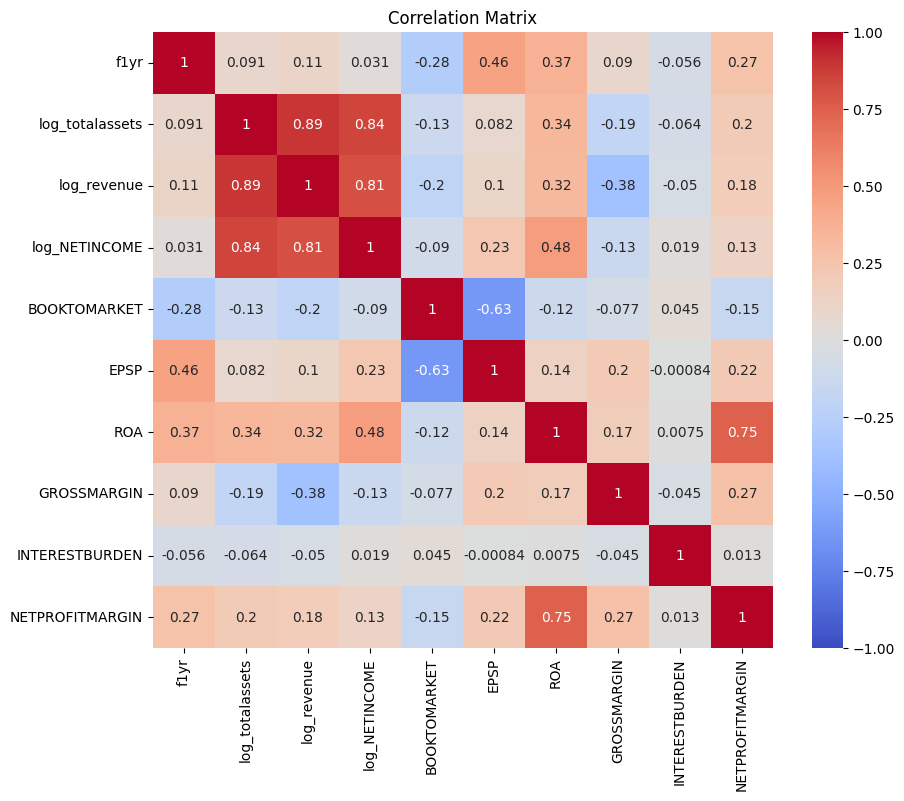

In [ ]:

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Las variables con relaciones más significativas con respecto a los retornos anuales son:

*   Earnings Per Share deflated by Price. La correlación positiva más fuerte, lo que sugiere que un ROA alto está relacionado con altos retornos anuales.
*   Return Over Assets. Una correlación positiva.
*   Net-profit margin. Una correlación positiva.
*   Book-to-market ratio. Es una correlación negativa pero con una magnitud alta, lo que significa que un Book-to-market bajo está relacionado con altos retornos anuales.





## Regression Model

En esta sección se desarrolla un modelo de regresión que busca predecir los retornos anuales. Las vaiables independientes seleccionadas son:
*   Return on assets.
*   Earnings Per Share deflated by Price.
*   Net-profit margin.
*   Book-to-market ratio.
*   Interest burden.
*   Gross margin.


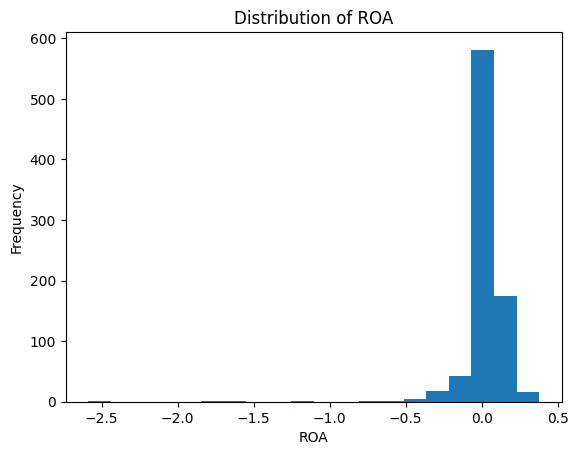

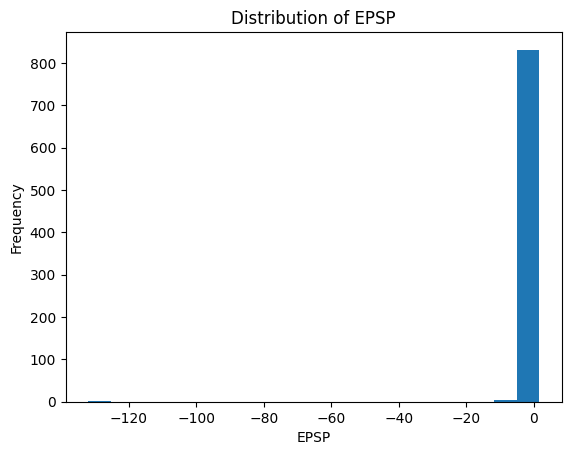

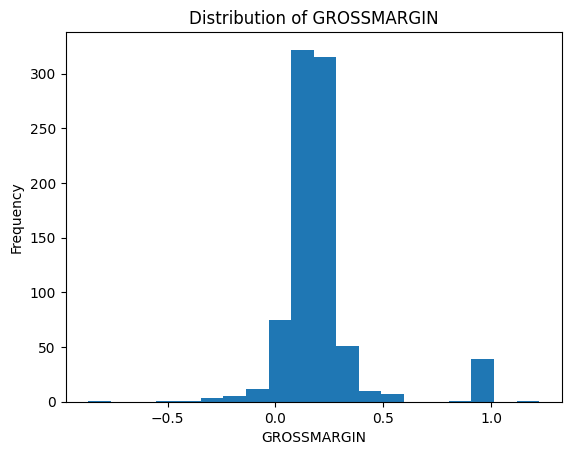

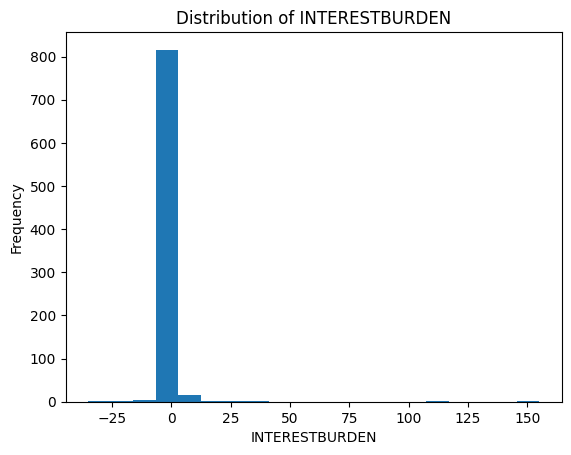

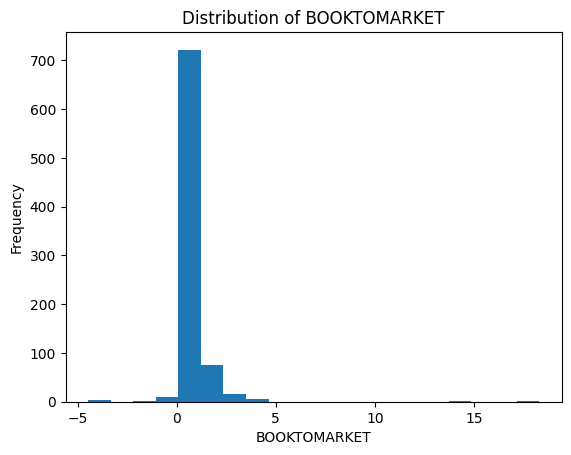

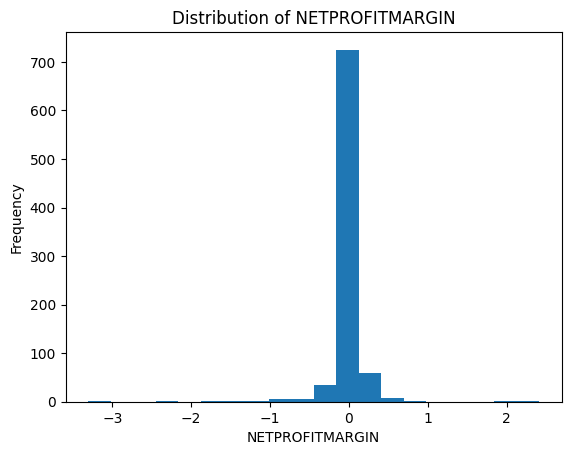

In [ ]:

# Create histograms for each financial ratio
for column in ['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']:
  plt.figure()
  plt.hist(cleaned_construccion_data[column], bins=20)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')
  plt.show()


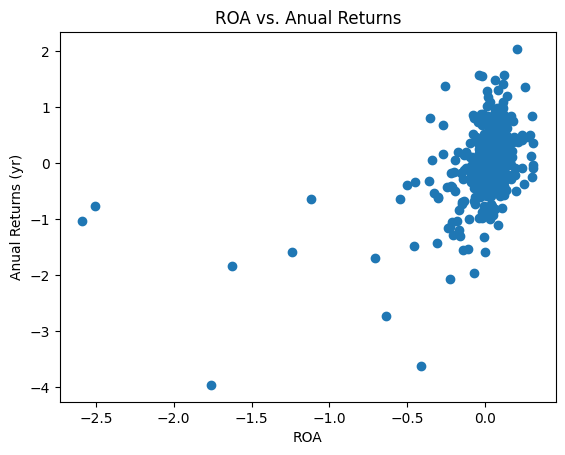

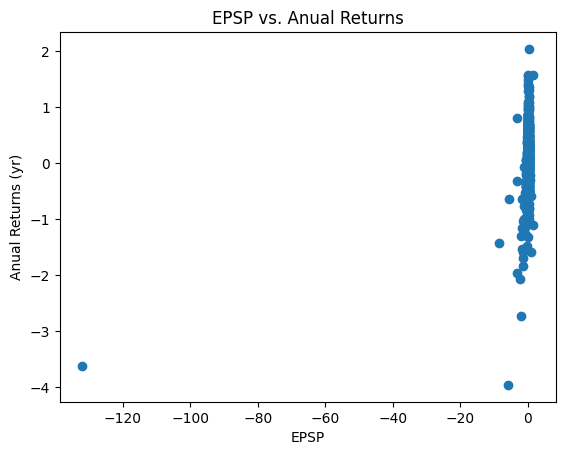

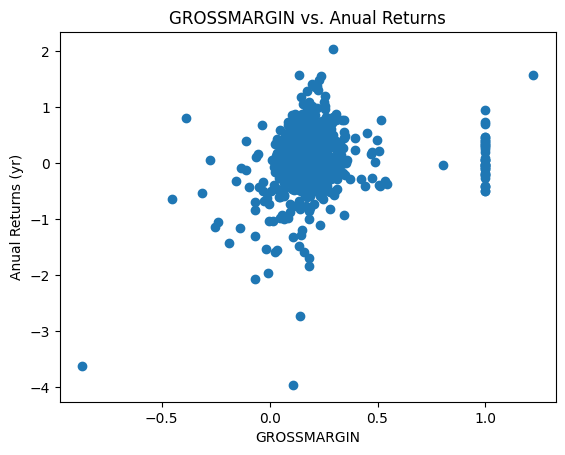

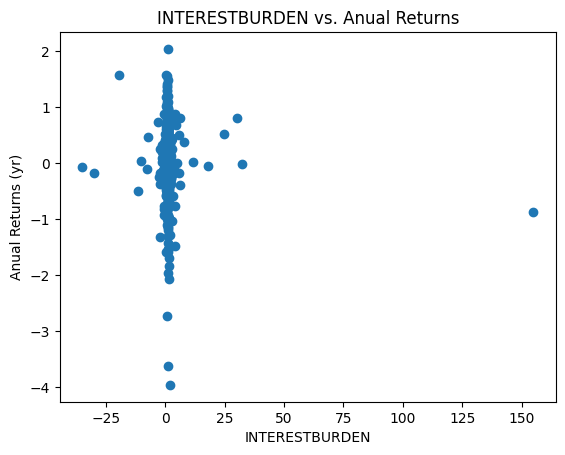

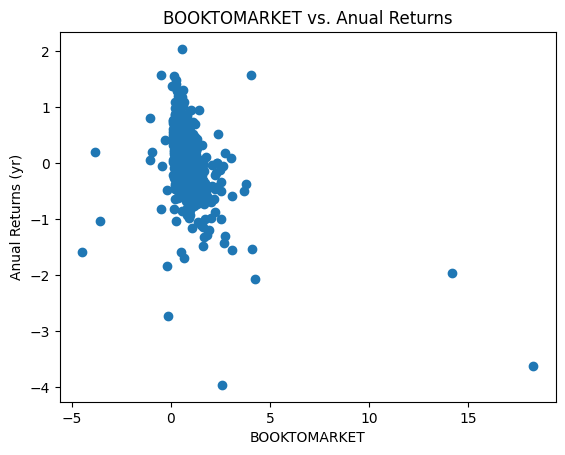

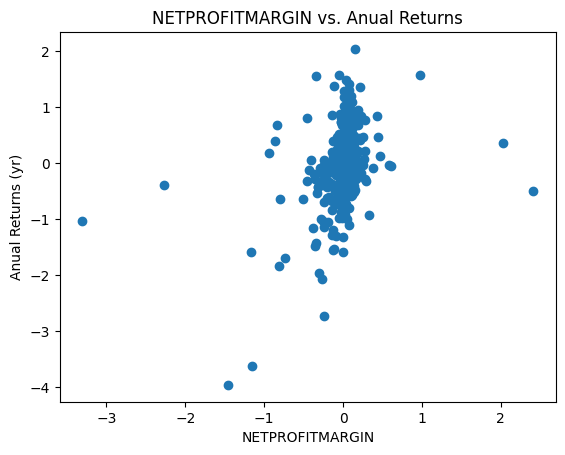

In [ ]:
# Scatter plots for each financial ratio against anual returns
for column in ['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']:
  plt.figure()
  plt.scatter(cleaned_construccion_data[column], cleaned_construccion_data['yr'])
  plt.xlabel(column)
  plt.ylabel('Anual Returns (yr)')
  plt.title(f'{column} vs. Anual Returns')
  plt.show()


La variable dependiente del modelo es el retorno anual futuro. Las variables se toman del dataframe cleaned_construccion_data, que se utilizó en la sección pasada y consiste en los datos filtrados por mes fiscal 12 para la industria de la construcción.

In [ ]:
import statsmodels.api as sm

x = cleaned_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']]
y = cleaned_construccion_data['f1yr']
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X,missing = 'drop').fit()
# I display the summary of the regression:
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1yr   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     56.64
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.84e-58
Time:                        13:59:52   Log-Likelihood:                -519.76
No. Observations:                 815   AIC:                             1054.
Df Residuals:                     808   BIC:                             1086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1485      0.028     

### Análisis de coeficientes y variables independientes

Un coeficiente positivo significa que si la variable independtiente aumenta, los retornos anuales futuros aumentan. Un coeficiente negatico indica que un decremento en la variable independiente causará que la variable dependiente aumente.

* ROA

Tiene un coeficiente de 1.16, el más alto de todas las variables dependientes. Un aumento de un 1% del ROA causará un aumento de 1.16% en el retorno anual predecido. Su P value es menor a 5%, lo que significa que la predicción de la variable está dentro del intervalo de confianza del 95%.

* EPSP

Tiene un coeficiente de 0.26, el cual es bajo. Su P value es menor a 5%, lo que significa que la predicción de la variable está dentro del intervalo de confianza del 95%.

* GROSS MARGIN

Tiene un coeficiente de 0.01, lo que significa que el cambio en gross margin tiene muy poco impacto en la variable dependiente predecida. Su P value es menor a 5%, lo que significa que la predicción de la variable está dentro del intervalo de confianza del 95%.

* INTEREST BURDEN

El P value es muy alto, lo que significa que no está dentro del intervalo de confianza y no se puede considerar esta variable para predecir los retornos anuales, ya que su variación no explica con suficiente certeza la variación de los retornos.

* BOOK TO MARKET

Tiene un coeficiente de -0.12, lo que significa que un aumento de 1% del book to market ratio causará un decremento de 0.12% en la variable dependiente. Su P value es menor a 5%, lo que significa que la predicción de la variable está dentro del intervalo de confianza del 95%.


* NET PROFIT MARGIN

Tiene un coeficiente de 0.30. Su P value es menor a 5%, lo que significa que la predicción de la variable está dentro del intervalo de confianza del 95%.



Lo anterior indica que las todas las variabes independientes exceptuando interest burden son significativas y explicativas para el modelo.

El modelo tiene una R² de 0.29, lo que indica que el modelo no explica con mucha presición la variabilidad de los retornos anuales. La R² indica qué tan cerca están los valores reales de los valores de la regresión linal. El valor debe estar entre 0 y 1, siendo 1 un ajuste perfecto.

La variable con el poder exploratorio mayor es el EPSP, ya que tiene una t mayor. Eso significa que la varianza de la variable dependiente (retornos anuales) se explica de mejor manera con la varianza del EPSP. Esto coincide con lo observado en la matriz de correlación.

## Cálculo de regresión con matriz

Se realizó un cálculo de la regresión lineal utilizando operaciones matriciales. Fue necesario utilizar dropna() para eliminar valores NaN.

In [ ]:
import numpy as np

def regression_matrix(X, y):
    """
    Calculates the regression coefficients using matrix calculations.

    Args:
        X: A NumPy array of independent variables.
        y: A NumPy array of dependent variable.

    Returns:
        A NumPy array of regression coefficients.
    """
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]

    # Calculate the coefficients using the matrix formula
    beta = np.linalg.inv(X.T @ X) @ X.T @ y

    return beta

# Remove rows with NaN values
cleaned_construccion_data_notnan = cleaned_construccion_data.dropna()

# Extract the independent and dependent variables
X = cleaned_construccion_data_notnan[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']].values
y = cleaned_construccion_data_notnan['f1yr'].values

# Calculate the regression coefficients
coefficients = regression_matrix(X, y)

# Print the coefficients
print("Regression Coefficients:")
print(coefficients)

# Calculate the predicted values
X_with_intercept = np.c_[np.ones(X.shape[0]), X]
y_pred = X_with_intercept @ coefficients

# Calculate the total sum of squares (SST)
sst = np.sum((y - np.mean(y)) ** 2)

# Calculate the residual sum of squares (SSR)
ssr = np.sum((y - y_pred) ** 2)

# Calculate the R-squared value
r_squared = 1 - (ssr / sst)

# Print the R-squared value
print("R-squared:")
print(r_squared)

Regression Coefficients:
[ 0.15003136  1.23057435  0.25871627  0.00123342 -0.00324519 -0.12690709
 -0.37733062]
R-squared:
0.29867192229507267


Los resultados del modelo son muy similares en R², con una difrencia de 0.002. Los coeficientes también son muy similares. Las diferencias se explican con la manera en la que la librería statsmodel maneja los valores NaN.

## Diagnostics

Después de obtener el modelo, se deben correr diagnósticos para poder mejorarlo y encontrar errores.

### Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
x_vif = cleaned_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']].dropna()
vif["features"] = x_vif.columns
vif["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

print(vif)

          features       VIF
0              ROA  2.298209
1             EPSP  1.678368
2      GROSSMARGIN  1.507503
3   INTERESTBURDEN  1.030690
4     BOOKTOMARKET  1.970581
5  NETPROFITMARGIN  2.394434


Un VIF menor a 5 indica una baja multicolinealidad, lo cual indica que no hay correlación importante entre las variables del modelo. Esto significa que las variables no tienen dependencias entre sí y pueden utilizarse como variables independientes.

### Leverage

Se utilizó un análisis de hat matrix points para identificar los leverage points más altos.

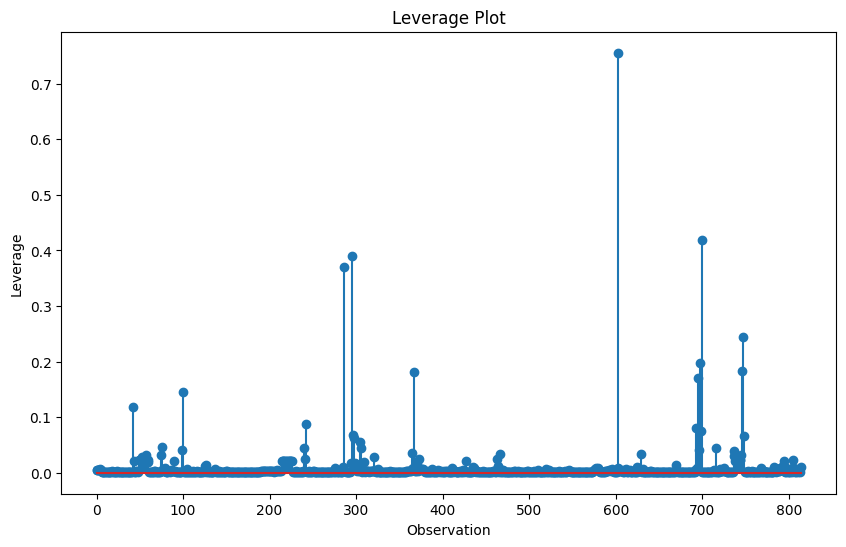

In [ ]:

from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(mkmodel)
leverage = influence.hat_matrix_diag
# I plot the leverage values:
plt.figure(figsize=(10,6))
plt.stem(leverage)
plt.xlabel('Observation')
plt.ylabel('Leverage')
plt.title('Leverage Plot')
plt.show()


## Outliers

Se utiliza el método de Cook's distance para encontrar outliers.

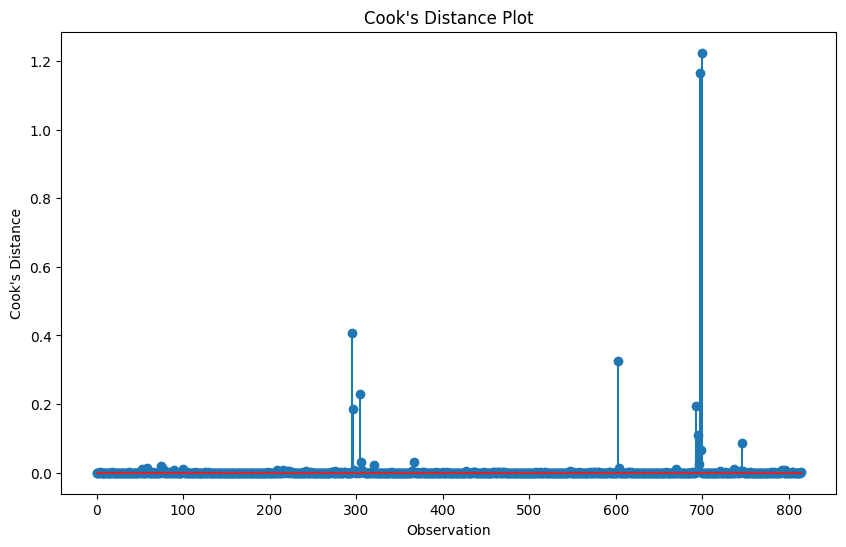

In [ ]:

# Calculate Cook's distance
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10,6))
plt.stem(cooks_d)
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


## Eliminación de outliers y leverage points

Se pueden observar algunos leverage points altos y outliers. Se utiliza la winsorización para eliminarlos.

En las gráficas pasadas, se pudo observar que los leverage points y los 1% de los extremos a ambos lados de la distribución de los valores. De esta manera se conservan la mayoría de las observaciones. Se hicieron pruebas con valores mayores y menores del porcentaje de datos eliminados, pero se encontró que los resultados empeoraban con otros valores.

In [ ]:

from scipy.stats.mstats import winsorize

# Define the limits for winsorization
limits = [0.01, 0.01]
winsorized_construccion_data = cleaned_construccion_data.copy()

# Apply winsorization to the relevant columns
for column in ['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']:
  winsorized_construccion_data[column] = winsorize(cleaned_construccion_data[column], limits=limits)


## Regression second iteration

Se realizó una segunda iteración del modelo utilizando los datos winsorizados.

In [ ]:
x = winsorized_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']]
y = winsorized_construccion_data['f1yr']
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X,missing = 'drop').fit()
# I display the summary of the regression:
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1yr   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     45.08
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.11e-47
Time:                        13:59:54   Log-Likelihood:                -545.88
No. Observations:                 817   AIC:                             1106.
Df Residuals:                     810   BIC:                             1139.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1580      0.034     

Se puede observar que la eliminación de leverage points y outliers no mejora el modelo.

El analisis de los coeficientes del segundo modelo es el siguiente.

* ROA

Tiene un coeficiente de 1.40, siendo de nuevo la variable con el coeficiente más alto.

* EPSP

Tiene un coeficiente de 0.29, similar al modelo original.

* GROSS MARGIN

Tiene un coeficiente de 0.0051, menor al modelo anterior. Además, en este caso no pasa la prueba de hipótesis, por lo que no es significativa.

* INTEREST BURDEN

De nuevo no pasa la prueba de hipótesis y no se encuentra dentro del intervalo de confianza.

* BOOK TO MARKET

Su coeficiente tiene un valor de -0.1631. De nuevo representa una relación inversa con la variable dependiente.


* NET PROFIT MARGIN

En este caso no pasa la prueba de hipótesis.



Para este modelo, la variable con mayor poder explicativo es ROA, que tiene un valor t de 5.09.

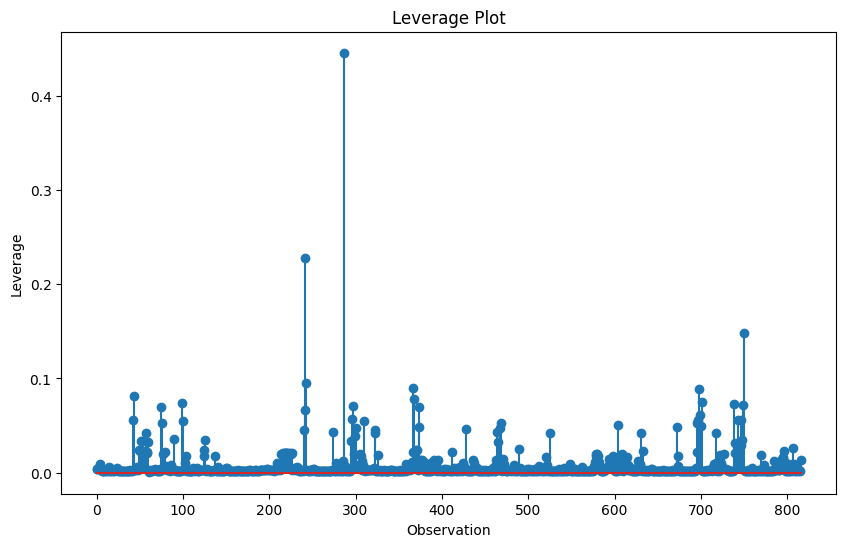

In [ ]:

from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(mkmodel)
leverage = influence.hat_matrix_diag
# I plot the leverage values:
plt.figure(figsize=(10,6))
plt.stem(leverage)
plt.xlabel('Observation')
plt.ylabel('Leverage')
plt.title('Leverage Plot')
plt.show()

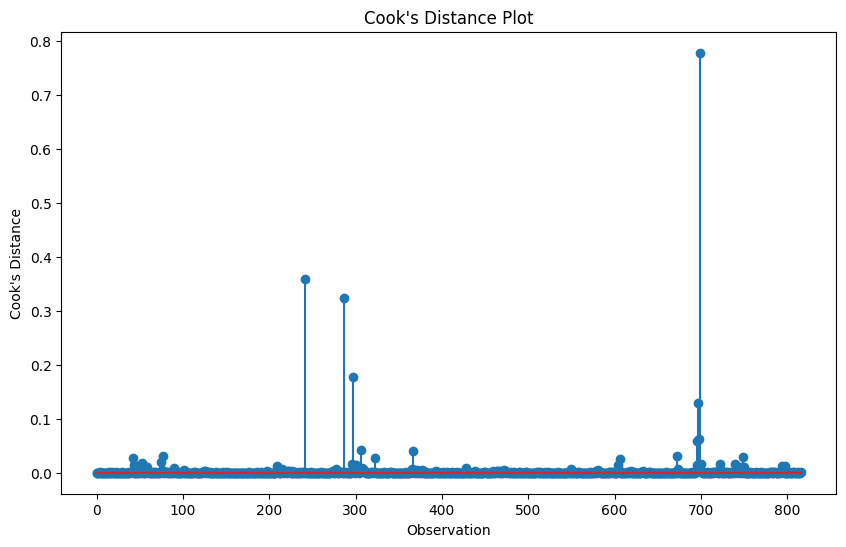

In [ ]:

# Calculate Cook's distance
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10,6))
plt.stem(cooks_d)
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

Se puede observar que los leverage points se disminuyeron, a pesar de que los outliers no se disminuyeron significativamente.

## Conclusiones

El primer modelo fue tiene una R² mayor, lo que significa que puede predecir con mayor precisión los retornos anuales futuros. La winsorización logró eliminar los leverage points más altos, pero no mejoró el ajuste del modelo. El primer modelo tiene una R² de 0.29, el cual no es muy alto, lo que significa que no es muy confiable para predecir los retornos anuales, lo cual tiene sentido al considerar que el retorno de las acciones de una empresa no puede ser predecible por concepto.

Los radios que son más útiles para predecir el retorno futuro de una empresa son return over assets y earnings per share deflated by price, ya que tienen coeficientes altos en la regresión, lo que significa que los cambios en estos radios causan cambios altos en los retornos, y tienen una t alta, lo que significa que son significativos para describir la variabilidad en los retornos. Esto tiene sentido, ya que ROA se relaciona con los retornos de la empresa, y EPSP se relaciona con las ganancias de las acciones.

# PARTE 2

## Multiple regression

### Variables categóricas

Se vuelve a seleccionar el conjunto de datos de la industria de construcción correspondientes al mes fiscal 12.

In [ ]:
construccion_data = data[(data['industria'] == 'Construcción')]
construccion_data

# Group the data by firm and year
construction_data_12 = construccion_data[construccion_data['fiscalmonth'] == 12]

cleaned_construccion_data = construction_data_12.replace([-np.inf, np.inf], np.nan)
cleaned_construccion_data

q  fiscalmonth    revenue       cogs      sgae  \
firm     qdate                                                         
ABCO_old 2012Q1  2012q1         12.0   370345.0   203187.0  130800.0   
         2013Q1  2013q1         12.0   450837.0   240037.0  167334.0   
         2014Q1  2014q1         12.0   520596.0   272523.0  200887.0   
         2014Q4  2014q4         12.0   520596.0   272523.0  200887.0   
         2015Q4  2015q4         12.0   768348.0   392676.0  430072.0   
...                 ...          ...        ...        ...       ...   
WLH_old  2014Q4  2014q4         12.0   896679.0   709760.0  110494.0   
         2015Q4  2015q4         12.0  1106552.0   901905.0  123629.0   
         2016Q4  2016q4         12.0  1406040.0  1165822.0  146250.0   
         2017Q4  2017q4         12.0  1796528.0  1479866.0  178706.0   
         2018Q4  2018q4         12.0  2087171.0  1708444.0  239822.0   

                 otherincome  extraordinaryitems   finexp  incometax  \
firm     qdate                                                         
ABCO_old 2012Q1       3034.0              1104.0      0.0    15203.0   
         2013Q1       2604.0             -6648.0      0.0    17259.0   
         2014Q1       2706.0             -5932.0      0.0    19208.0   
         2014Q4       2706.0             -5932.0      0.0    19208.0   
         2015Q4     -23897.0             -4396.0  21121.0    15200.0   
...                      ...                 ...      ...        ...   
WLH_old  2014Q4       1898.0             -9901.0      0.0    23797.0   
         2015Q4       2810.0               314.0      0.0    26806.0   
         2016Q4       3243.0             -2665.0      0.0    34850.0   
         2017Q4     -20933.0             -5955.0      0.0    62933.0   
         2018Q4       3730.0            -20419.0      0.0    30620.0   

                 totalassets  ...      EPSP        QR        YR        qr  \
firm     qdate                ...                                           
ABCO_old 2012Q1     705588.0  ...  0.024609  0.194179  0.720777  0.177459   
         2013Q1     877707.0  ...  0.023573  0.122462  0.185285  0.115525   
         2014Q1    1041335.0  ...  0.020320  0.009109  0.223343  0.009068   
         2014Q4    1126366.0  ...  0.026751  0.051299 -0.230721  0.050026   
         2015Q4    1979866.0  ... -0.026175  0.089372  0.012862  0.085601   
...                      ...  ...       ...       ...       ...       ...   
WLH_old  2014Q4    1674427.0  ...  0.120670 -0.082805 -0.084463 -0.086436   
         2015Q4    1923450.0  ...  0.156046 -0.199029 -0.185989 -0.221931   
         2016Q4    1998151.0  ...  0.155770  0.025876  0.153333  0.025547   
         2017Q4    2061104.0  ...  0.149083  0.264898  0.528114  0.234991   
         2018Q4    2929774.0  ...  0.344163 -0.327250 -0.632393 -0.396381   

                       yr      f1yr       ROA  GROSSMARGIN  NETPROFITMARGIN  \
firm     qdate                                                                
ABCO_old 2012Q1  0.542776  0.538564  0.035847     0.451358         0.068296   
         2013Q1  0.169984  0.097160  0.025251     0.467575         0.049160   
         2014Q1  0.201588 -0.052594  0.023769     0.476517         0.047546   
         2014Q4 -0.262301 -0.187221  0.021975     0.476517         0.047546   
         2015Q4  0.012780 -0.502043 -0.060112     0.488935        -0.154896   
...                   ...       ...       ...          ...              ...   
WLH_old  2014Q4 -0.088244 -0.067029  0.026651     0.208457         0.049767   
         2015Q4 -0.205782 -0.577691  0.029809     0.184941         0.051815   
         2016Q4  0.142656  0.352803  0.029876     0.170847         0.042457   
         2017Q4  0.424034  0.287561  0.023354     0.176263         0.026793   
         2018Q4 -1.000742 -0.581405  0.031264     0.181455         0.043885   

                 INTERESTBURDEN  
firm     qdate                   
ABCO_old 2012Q1        1.113813  
         2013Q1 

Después, se busca agrupar las empresas en categorías de acuerdo a su Market-Value, para esto, primero se buscan los valores máximos y mínimos.

In [ ]:
cleaned_construccion_data['MARKETVALUE'].describe()

,MARKETVALUE
count,8.350000e+02
mean,2.910607e+06
std,4.442258e+06
min,4.635351e+02
25%,4.783510e+05
50%,1.444401e+06
75%,3.354259e+06
max,4.185349e+07


El valor máximo es 41,853,490 dólares. Por lo tanto, de decidió definir los siguientes tamaños:


*   small: 0 a 15000
*   medium: 15001 a 30000
*   big: 30001 a 50000



In [ ]:
def categorize_market_value(market_value):
  if 0 <= market_value <= 15000:
    return 'small'
  elif 15001 <= market_value <= 30000:
    return 'medium'
  elif 30001 <= market_value <= 50000:
    return 'big'
  else:
    return 'big'

cleaned_construccion_data['company_size'] = cleaned_construccion_data['MARKETVALUE'].apply(categorize_market_value)


Se utiliza dummy encoding para la variable categórica.


In [ ]:

company_size_dummies = pd.get_dummies(cleaned_construccion_data['company_size'], prefix='company_size', drop_first=True).astype(int)
cleaned_construccion_data = pd.concat([cleaned_construccion_data, company_size_dummies], axis=1)
company_size_dummies

company_size_medium  company_size_small
firm     qdate                                          
ABCO_old 2012Q1                    0                   0
         2013Q1                    0                   0
         2014Q1                    0                   0
         2014Q4                    0                   0
         2015Q4                    0                   0
...                              ...                 ...
WLH_old  2014Q4                    0                   0
         2015Q4                    0                   0
         2016Q4                    0                   0
         2017Q4                    0                   0
         2018Q4                    0                   0

[846 rows x 2 columns]

### Primera regresión

Se ejecuta un modelo de regresión

In [ ]:
import statsmodels.api as sm

x = cleaned_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN', "company_size_medium",	"company_size_small"]]
y = cleaned_construccion_data['f1yr']
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X,missing = 'drop').fit()
# I display the summary of the regression:
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1yr   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     42.86
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.76e-57
Time:                        13:59:55   Log-Likelihood:                -518.38
No. Observations:                 815   AIC:                             1055.
Df Residuals:                     806   BIC:                             1097.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1494    

La regesión indica que las siguientes variables son significativas:


*   ROA:
      Tiene un coeficiente de 1.06, es una de las variables más significativas. Se encuentra dentro del intervalo de confianza mayor a 95%
*   ESPS
      Es la variable con mayor poder explicativo, ya que su valor t es el mayor, con 6.7. Su coeficiente es de 0.25.
*   BOOKTOMARKET
      Su coeficiente es negativo, lo que significa que un aumento en market to value corresponde a un decremento en retornos futuros.
*   NETPROFITMARGIN
      Su coeficiante también es negativo.

Las siguientes variables no son significativas porque no tienen un valor t mayor a 2:


*   GROSSMARGIN
*   INTERESTBURDEN
*   company_size_medium
*   company_size_small

Las variables company_size_medium y company_size_small indican un coeficiente que solo está presente cuando el valor de company_size corresponde a la categoría medium o small, respectivamente. En este caso, ninguna de las dos variables pasa la prueba de hipótesis, por lo que no se pueden considerar como significativas, y la ecuación resultante será igual para las 3 categorías.

Ecuación para small:
$f1yr = 0.1494 + 1.0686*ROA + 0.2580 * EPSP-0.1173 * BOOKTOMARKET-0.2720*NETPROFITMARGIN$

Ecuación para medium:
$f1yr = 0.1494 + 1.0686*ROA + 0.2580 * EPSP-0.1173 * BOOKTOMARKET-0.2720*NETPROFITMARGIN$

Ecuación para big:
$f1yr = 0.1494 + 1.0686*ROA + 0.2580 * EPSP-0.1173 * BOOKTOMARKET-0.2720*NETPROFITMARGIN$


Posteriormente, se incorpora la variable fleverage, que se calcula de la siguiente manera:

fleverage = longdebt / totalassets

Además, se incorpora una variable que representa el valor fleverage al cuadrado, para poder incorporar un comportamiento no lineal dentro del modelo.

### Eliminación de outliers

Se utiliza el método de z-scores para eliminar los outliers. Este método busca para cada columna los valores que se encuentran fuera del 99% de la distribución de la columna entera. Se eliminaron los puntos correspondientes a cada uno de estos puntos.

In [ ]:
# List of columns to compute Z-scores
columns = ['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN']

# Compute Z-scores for each column and keep rows where all Z-scores are below the threshold
z_scores = np.abs((cleaned_construccion_data[columns] - cleaned_construccion_data[columns].mean()) / cleaned_construccion_data[columns].std())

# Remove rows where any Z-score is greater than 3
cleaned_construccion_data = cleaned_construccion_data[(z_scores < 3).all(axis=1)]

### Fleverage

Se añade la variable fleverage.

In [ ]:

cleaned_construccion_data['fleverage'] = cleaned_construccion_data['longdebt'] / cleaned_construccion_data['totalassets']
cleaned_construccion_data['fleverage_squared'] = cleaned_construccion_data['fleverage'] ** 2

### Segundo modelo

In [ ]:
import statsmodels.api as sm

x = cleaned_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN', "company_size_medium",	"company_size_small", "fleverage", "fleverage_squared"]]
y = cleaned_construccion_data['f1yr']
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X,missing = 'drop').fit()
# I display the summary of the regression:
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1yr   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.74
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           8.14e-26
Time:                        13:59:55   Log-Likelihood:                -427.27
No. Observations:                 750   AIC:                             876.5
Df Residuals:                     739   BIC:                             927.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2489    

La regesión indica que las siguientes variables son significativas:


*   ROA:
      Tiene un coeficiente de 1.23, es una de las variables más significativas. Se encuentra dentro del intervalo de confianza mayor a 95%
*   ESPS
      Su coeficiente es de 0.12.
*   BOOKTOMARKET
      Su coeficiente es negativo, lo que significa que un aumento en market to value corresponde a un decremento en retornos futuros.
*   company_size_small
      Su coeficiente es positivo. Esta variable indica que la ecuación cambia cuando la compañía es pequeña

Las siguientes variables no son significativas porque no tienen un valor t mayor a 2:


*   GROSSMARGIN
*   INTERESTBURDEN
*   company_size_medium
*   fleverage
*   fleverage_squared
*   NETPROFITMARGIN

Las variables company_size_medium y company_size_small indican un coeficiente que solo está presente cuando el valor de company_size corresponde a la categoría medium o small, respectivamente. company_size_medium tuvo un valor t menor a 2, por lo que no es significativa y no modifica a la ecuación original.

Ecuación para small:
$f1yr = 0.2489 + 1.2354*ROA-0.2247 * BOOKTOMARKET+0.5619*company\_size\_small$

Ecuación para medium:
$f1yr = 0.2489 + 1.2354*ROA-0.2247 * BOOKTOMARKET$

Ecuación para big:
$f1yr = 0.2489 + 1.2354*ROA-0.2247 * BOOKTOMARKET$

### Términos de interacción

Posteriormente, se agregan términos de interacción entre la variable categórica company_size y las variables EPSP y book to market ratio.



In [ ]:

cleaned_construccion_data['EPSP_medium'] = cleaned_construccion_data['EPSP'] * cleaned_construccion_data['company_size_medium']
cleaned_construccion_data['EPSP_small'] = cleaned_construccion_data['EPSP'] * cleaned_construccion_data['company_size_small']
cleaned_construccion_data['BOOKTOMARKET_medium'] = cleaned_construccion_data['BOOKTOMARKET'] * cleaned_construccion_data['company_size_medium']
cleaned_construccion_data['BOOKTOMARKET_small'] = cleaned_construccion_data['BOOKTOMARKET'] * cleaned_construccion_data['company_size_small']


### Regresión final

In [ ]:
x = cleaned_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN', "company_size_medium", "company_size_small", "fleverage", "fleverage_squared", 'EPSP_medium', 'EPSP_small', 'BOOKTOMARKET_medium', 'BOOKTOMARKET_small']]
y = cleaned_construccion_data['f1yr']

X = sm.add_constant(x)
mkmodel = sm.OLS(y,X,missing = 'drop').fit()
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1yr   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.61
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.79e-24
Time:                        13:59:55   Log-Likelihood:                -424.77
No. Observations:                 750   AIC:                             879.5
Df Residuals:                     735   BIC:                             948.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2556    

La regesión indica que las siguientes variables son significativas:


*   ROA:
      Tiene un coeficiente de 1.17. Se encuentra dentro del intervalo de confianza mayor a 95%
*   ESPS
      Su coeficiente es de 0.1335.
*   BOOKTOMARKET
      Su coeficiente es negativo, lo que significa que un aumento en market to value corresponde a un decremento en retornos futuros. Es la variable con mayor poder explicativo por su valor de t.

Las siguientes variables no son significativas porque no tienen un valor t mayor a 2:


*   GROSSMARGIN
*   INTERESTBURDEN
*   company_size_medium
*   company_size_small
*   fleverage
*   fleverage_squared
*   NETPROFITMARGIN
*   EPSP_medium
*   EPSP_small
*   BOOKTOMARKET_medium
*   BOOKTOMARKET_small

Las variables company_size_medium y company_size_small indican un coeficiente que solo está presente cuando el valor de company_size corresponde a la categoría medium o small, respectivamente. En este caso, ninguna de las dos variables pasa la prueba de hipótesis, por lo que no se pueden considerar como significativas, y la ecuación resultante será igual para las 3 categorías.

Las variables de interacción también modifican la ecuación original para cada una de las categorías. Sin embargo, ninguna variable de interacción resultó ser significativa, por lo que no se incluyen en la ecuación.

Ecuación para small:
$f1yr = 0.2556 + 1.1712*ROA-0.2352 * BOOKTOMARKET$

Ecuación para medium:
$f1yr = 0.2556 + 1.1712*ROA-0.2352 * BOOKTOMARKET$

Ecuación para big:
$f1yr = 0.2556 + 1.1712*ROA-0.2352 * BOOKTOMARKET$

El valor de R² mejoró con respecto a la regresión anterior, teniendo un valor final de 0.181

### Multicolinariedad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
x_vif = cleaned_construccion_data[['ROA', 'EPSP', 'GROSSMARGIN', 'INTERESTBURDEN', 'BOOKTOMARKET', 'NETPROFITMARGIN', "EPSP_medium", "EPSP_small", "BOOKTOMARKET_medium", "BOOKTOMARKET_small"]].dropna()
vif["features"] = x_vif.columns
vif["VIF"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

print(vif)

              features       VIF
0                  ROA  4.295796
1                 EPSP  1.547252
2          GROSSMARGIN  3.303550
3       INTERESTBURDEN  1.479156
4         BOOKTOMARKET  2.263599
5      NETPROFITMARGIN  3.759902
6          EPSP_medium  1.683898
7           EPSP_small  1.111842
8  BOOKTOMARKET_medium  1.692185
9   BOOKTOMARKET_small  1.046880


Todas las variables se encuentran debajo de un valor de 5 de VIF, por lo que no tienen multicolienariedad.

### Predicción de 10 acciones

Para calcular las 10 acciones con mejores retornos, se añadió una columna de predicciones de retornos anuales futuros en el próximo cuarto. Después, se seleccionó el tercer cuarto de 2023, que es el último disponible para la mayoría de las acciones. Finalmente se ordenaron de mayor a menor.

In [ ]:
predicted_f1yr = mkmodel.predict(X)
cleaned_construccion_data['predicted_f1yr'] = predicted_f1yr

recent_data  = cleaned_construccion_data.loc[(slice(None), '2023q4'), :]
sorted_stocks = recent_data.sort_values('predicted_f1yr', ascending=False)

top_10_stocks = sorted_stocks.head(10)

# 4. Display the selected stocks with their predicted f1yr values.
print("Top 10 Promising Stocks:")
print(top_10_stocks[['predicted_f1yr']])


Top 10 Promising Stocks:
             predicted_f1yr
firm qdate                 
NVR  2023Q4        0.454202
IBP  2023Q4        0.323834
PHM  2023Q4        0.304871
DFH  2023Q4        0.299975
BLD  2023Q4        0.299675
FIX  2023Q4        0.284960
EME  2023Q4        0.277258
STRL 2023Q4        0.272948
GRBK 2023Q4        0.257868
PWR  2023Q4        0.245858


La acción con mayor retorno anual predecido es NVR.

### Conclusiones

El modelo final tiene una R² de 0.181, lo que significa que no puede calcular con mucha exactitud el valor de los retornos anuales futuros. Sin embargo, es una aproximación apropiada, debido a la naturaleza del problema, en el que no es posible obtener predicciones exactas. El modelo integra variables de interacción y variables categóricas. Sin embargo, éstas variables resultaron no ser estadísiticamente significativas, debido a que no se encuentran dentro del intervalo de confianza del 95%. El modelo permite plantear ecuaciones diferentes para cada categoría de tamaño de empresa, pero resultaron ser iguales para las 3 categorías por las variables significativas.

# Time series

### Selección del modelo

En esta sección se busca predecir el Indicador Global de la Actividad Económica (IGAE) para los siguientes 6 años en México. El análisis debe hacerse considerando que el indicador varía con el tiempo, por lo que se utilizan técnicas para la predicción de series de tiempo. Este análisis requiere un modelo estocástico, ya que se deben introducir cambios aleatorios, los cuales son comunes en indicadores económicos. En este caso, se utiliza un modelo ARIMA/SARIMA, el cual es una derivación de Random Walk.

### Cargar datos

Se cargan los datos oficiales.

In [ ]:
igaedata = pd.read_csv('igae.csv')
igaedata = igaedata.drop(igaedata.columns[0], axis=1)
igaedata.head()

,1993|Enero,1993|Febrero,1993|Marzo,1993|Abril,1993|Mayo,1993|Junio,1993|Julio,1993|Agosto,1993|Septiembre,1993|Octubre,...,2024|Abril<P>,2024|Mayo<P>,2024|Junio<R>,2024|Julio<P>,2024|Agosto,2024|Septiembre,2024|Octubre,2024|Noviembre,2024|Diciembre,2024|Anual
0,55.434736,56.456971,58.900549,57.135844,57.891853,57.475466,57.902380,57.123934,58.482049,57.579434,...,105.761270,107.868081,104.049350,106.727192,NaN,NaN,NaN,NaN,NaN,NaN
1,58.796198,60.763816,55.964953,58.989164,61.762078,63.641132,72.628654,57.488221,54.105257,54.984773,...,93.616458,115.737397,109.980834,114.238830,NaN,NaN,NaN,NaN,NaN,NaN
2,54.888804,56.855371,50.409267,52.261002,55.582213,57.282877,68.319936,42.898071,38.338437,40.901000,...,85.964795,117.459113,108.212905,112.856003,NaN,NaN,NaN,NaN,NaN,NaN
3,67.248422,68.977815,67.346044,73.409111,75.161246,77.687091,81.891772,88.914213,88.045743,85.280916,...,110.293170,112.483585,114.229715,117.483418,NaN,NaN,NaN,NaN,NaN,NaN
4,63.307782,64.889130,68.070475,64.524614,64.382808,62.471146,64.791953,66.301834,67.703709,66.405456,...,106.098672,107.052347,103.535412,106.218555,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import re

# Mapeo de meses en español a inglés
meses_ingles = {
    'Enero': 'January', 'Febrero': 'February', 'Marzo': 'March', 'Abril': 'April',
    'Mayo': 'May', 'Junio': 'June', 'Julio': 'July', 'Agosto': 'August',
    'Septiembre': 'September', 'Octubre': 'October', 'Noviembre': 'November', 'Diciembre': 'December'
}

# Función para limpiar y convertir el nombre de las columnas a formato datetime
def convertir_a_fecha(col_name):
    # Separar el año y el mes
    año, mes = col_name.split('|')

    # Limpiar el mes eliminando etiquetas HTML u otros caracteres extraños
    mes = re.sub(r'<[^>]+>', '', mes).strip()

    # Si el mes es "Anual", lo marcamos para eliminarlo
    if mes.lower() == 'anual':
        return None

    # Convertir el mes de español a inglés
    mes_en_ingles = meses_ingles.get(mes, mes)  # Usa el nombre en inglés si está en el mapeo

    # Crear una fecha usando el primer día del mes
    return pd.to_datetime(f'{año}-{mes_en_ingles}-01', format='%Y-%B-%d', errors='coerce')

# Aplicar la función a las columnas
nuevas_columnas = [convertir_a_fecha(col) for col in igaedata.columns]

# Crear un DataFrame con las columnas que no son None (esto eliminará "año|Anual")
igaedata.columns = nuevas_columnas
igaedata = igaedata.loc[:, igaedata.columns.notna()]

# Tomar la columna del total
igae = igaedata.iloc[0].dropna()

# Verificar los cambios
print(igae.head())

1993-01-01    55.434736
1993-02-01    56.456971
1993-03-01    58.900549
1993-04-01    57.135844
1993-05-01    57.891853
Name: 0, dtype: float64


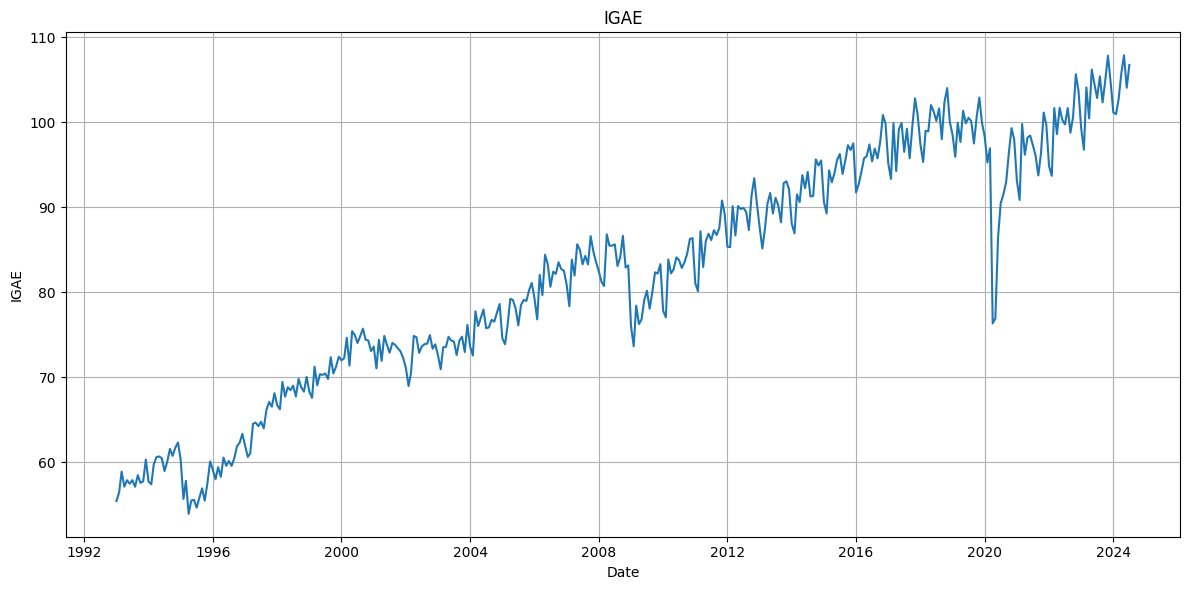

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(igae)
plt.xlabel('Date')
plt.ylabel('IGAE')
plt.title('IGAE')

plt.grid(True)
plt.tight_layout()
plt.show()


### Buscar estacionalidad

El modelo ARIMA/SARIMA requiere que la variable a predecir sea estacional, lo que significa que muestra un patrón a través del tiempo. Si la variable no es estacional, como en este caso, se busca la diferencia estacional de su logaritmo, la cual usualmente es estacional en indicadores financieros.

En primer lugar se obtiene el logaritmo.

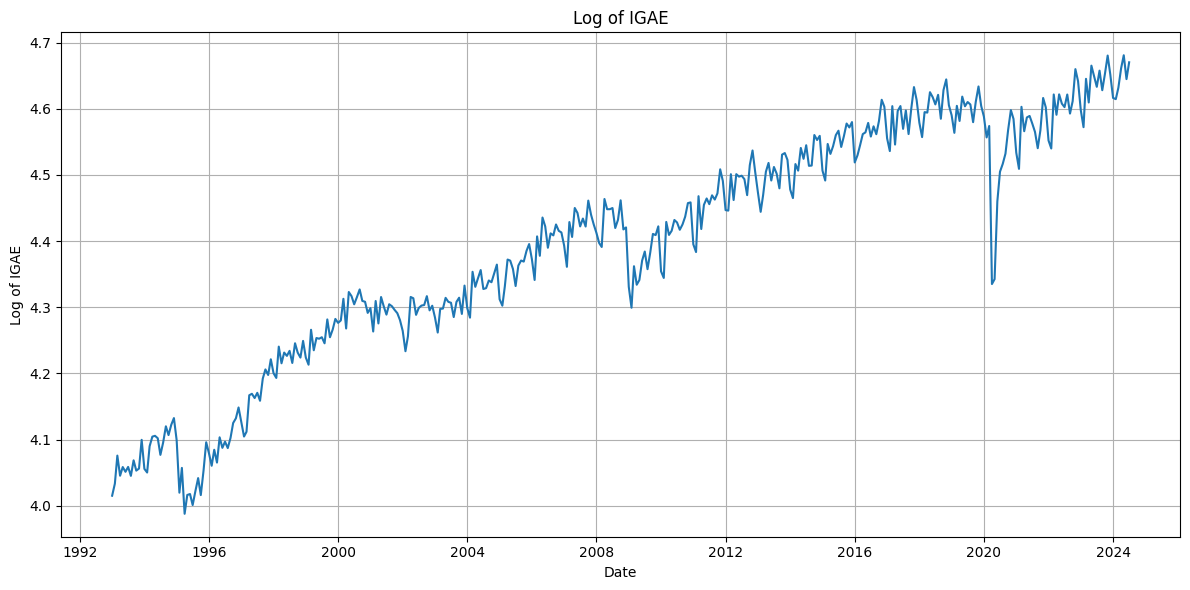

In [ ]:
igae_log = np.log(igae)

# Plot the log of IGAE
plt.figure(figsize=(12, 6))
plt.plot(igae_log)
plt.xlabel('Date')
plt.ylabel('Log of IGAE')
plt.title('Log of IGAE')

plt.grid(True)
plt.tight_layout()
plt.show()


Una vez teniendo el logaritmo, se realiza una diferencia estacional, en este caso a 12 meses.

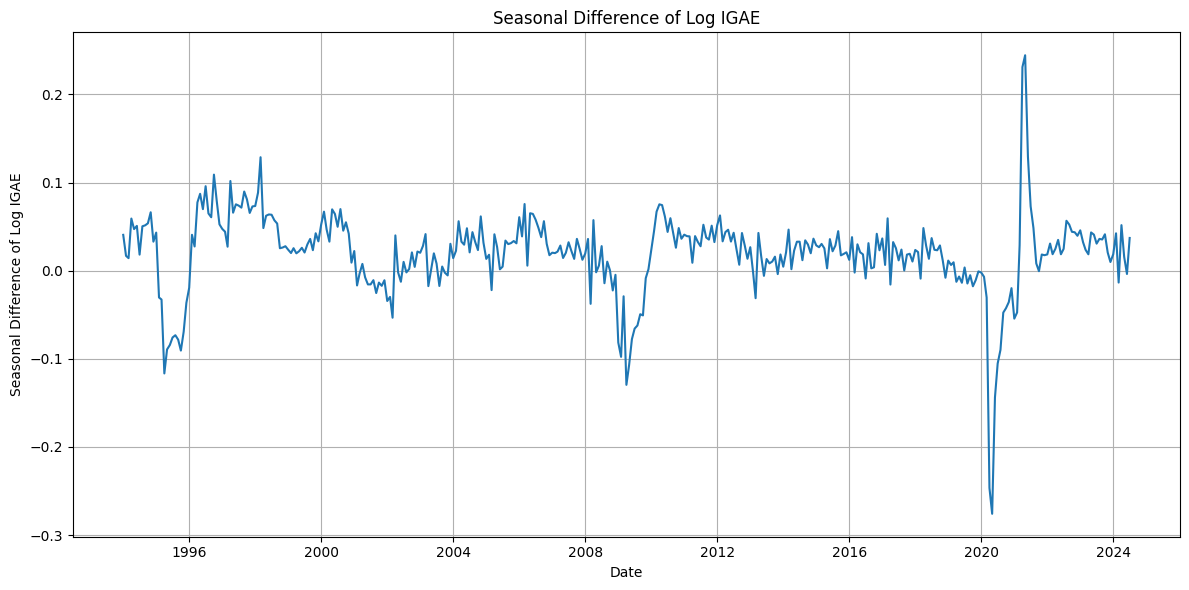

In [ ]:

seasonal_diff_log_igae = igae_log.diff(12)
seasonal_diff_log_igae = seasonal_diff_log_igae.dropna()

plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff_log_igae)
plt.xlabel('Date')
plt.ylabel('Seasonal Difference of Log IGAE')
plt.title('Seasonal Difference of Log IGAE')

plt.grid(True)
plt.tight_layout()
plt.show()


La serie resultante muestra un patrón estacional. Para comprobarlo, se utiliza la prueba de Dicky-Fuller.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(seasonal_diff_log_igae)

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the results
if result[1] <= 0.05:
  print("The time series is likely stationary.")
else:
  print("The time series is likely non-stationary.")


ADF Statistic: -3.901361935797889
p-value: 0.0020248468400375945
Critical Values: {'1%': -3.4490114443793214, '5%': -2.8697627072503757, '10%': -2.5711506161673716}
The time series is likely stationary.


El resultado de la prueba indica que la serie es estacional, por lo que se puede proceder a calibrar el modelo ARIMA/SARIMA

### Calibración

La calibración del modelo busca que la gráfica de autocorrelación de los residuales del modelo sean ruido blanco, o sea que no exista autocorrelación con periodos pasados. Para calibrar, primero se busca el patrón en las gráficas de Autocorrelación y Autocorrelación Parcial.

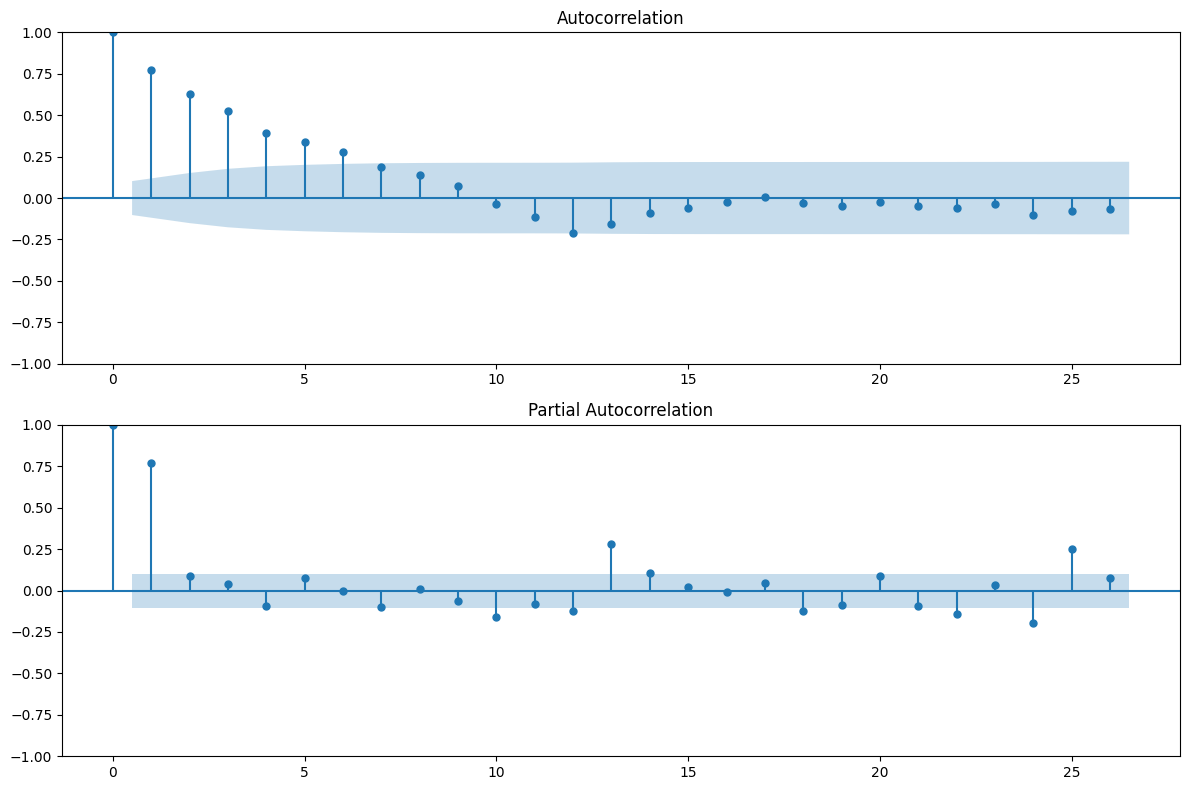

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(seasonal_diff_log_igae, ax=ax1)
plot_pacf(seasonal_diff_log_igae, ax=ax2)

plt.tight_layout()
plt.show()


El patrón de las gráficas corresponde a un patrón AR Signature. Esto indica que se deben considerar los siguientes valores:


*   p = Número de autocorrelaciones significativas en PAC (2)
*   d = 0
*   P = 0
*   Q = 0
*   D = 1



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  367
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 570.273
Date:                            Thu, 17 Oct 2024   AIC                          -1132.545
Time:                                    14:00:02   BIC                          -1117.057
Sample:                                01-01-1994   HQIC                         -1126.383
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.003     -0.048      0.962      -0.006       0.005
ar.L1          0.7346      0.028   

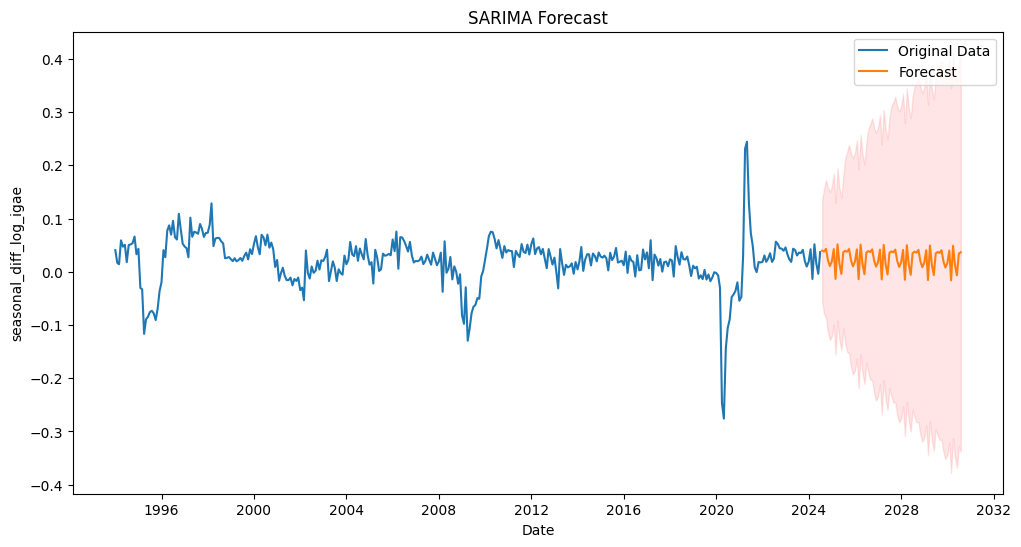

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order of the model (p, d, q) for AR, I, and MA components
# and seasonal order (P, D, Q, s) for seasonal AR, I, MA, and periodicity
order = (2, 0, 0)  # Example order
seasonal_order = (0, 1, 0, 12)  # Example seasonal order

# Create and fit the SARIMA model
model = SARIMAX(seasonal_diff_log_igae, order=order, seasonal_order=seasonal_order, trend="c")
results = model.fit(disp=0)
results_filter = model.filter(results.params)

# Print the model summary
print(results.summary())

forecast = results_filter.get_prediction(start=len(seasonal_diff_log_igae), end=len(seasonal_diff_log_igae)+72).summary_frame(alpha=0.05)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff_log_igae, label='Original Data')
plt.plot(forecast["mean"], label='Forecast')
plt.fill_between(
    forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'],
    color='r', alpha=0.1
)
plt.xlabel('Date')
plt.ylabel('seasonal_diff_log_igae')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

El modelo resultante se puede comparar con modelos posteriores utilizando su valor AIC, que indica el error, y se busca el valor más pequeño posible. En esta primera iteración, el valor es -1132.545

Ahora, se analizan los residuales para buscar correlaciones existentes.

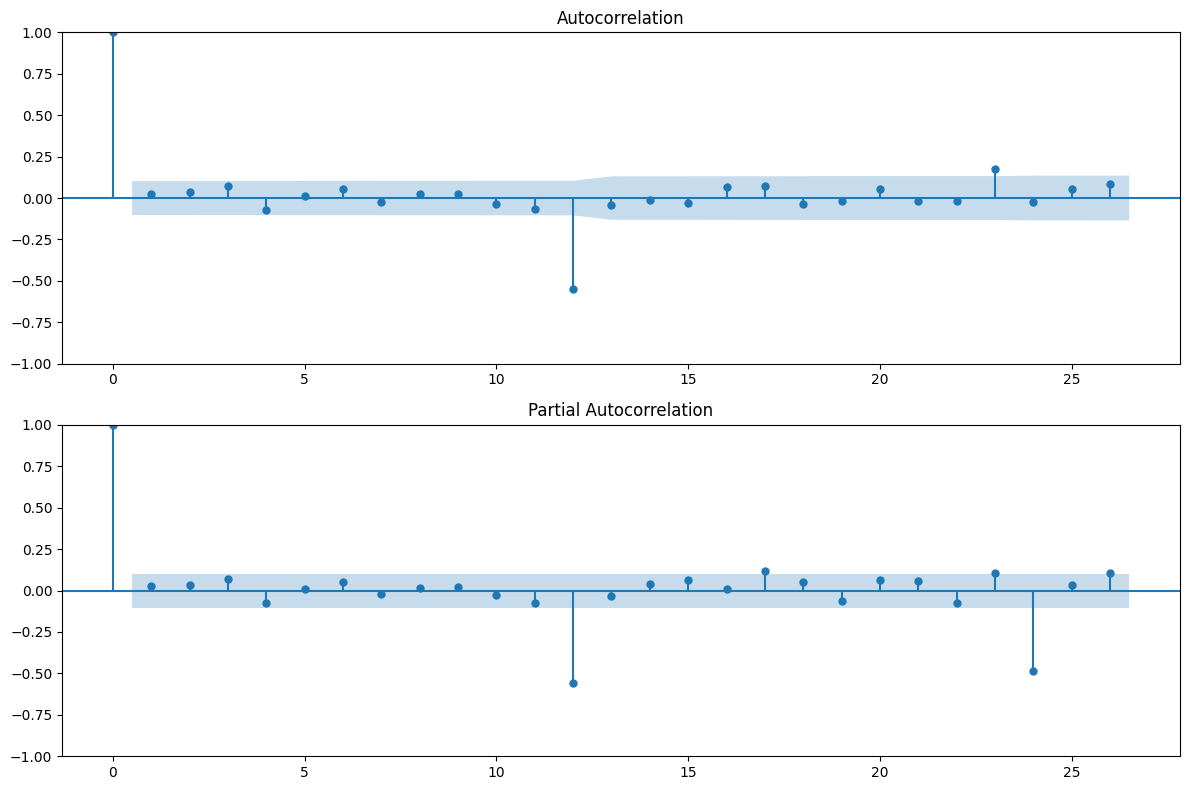

In [ ]:

residuals = results.resid

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)

plt.tight_layout()
plt.show()


Se puede observar que persisten autocorrelaciones cada 12 meses. Estas se pueden eliminar utilizando los valore de P y Q. P corresponde normalmente a autocorrelaciones de largo plazo, y Q de corto plazo. Para este caso, se utiliza un valor P = 1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  367
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                 632.566
Date:                            Thu, 17 Oct 2024   AIC                          -1257.131
Time:                                    14:00:07   BIC                          -1241.643
Sample:                                01-01-1994   HQIC                         -1250.969
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.002      0.113      0.910      -0.004       0.005
ar.L1          0.7499      0.025   

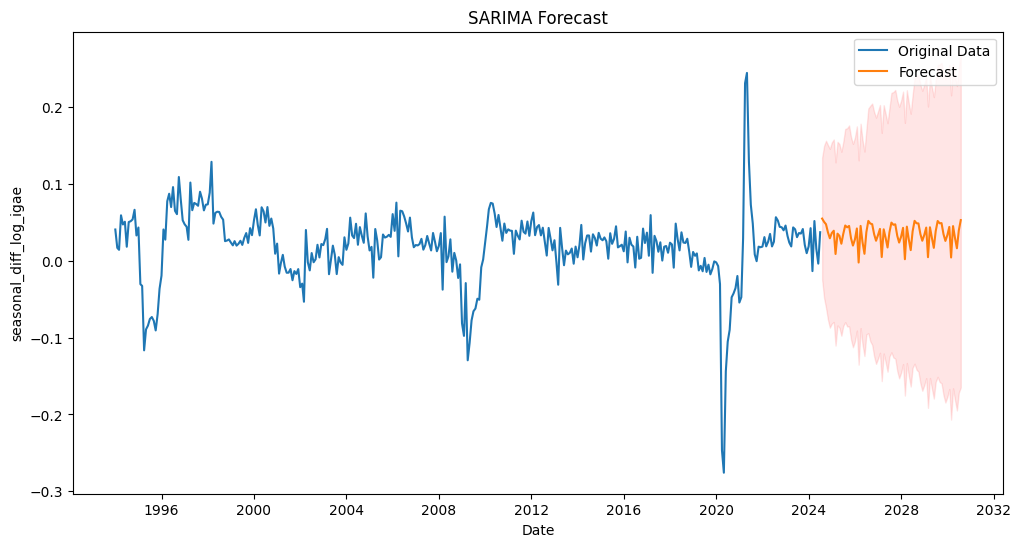

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order of the model (p, d, q) for AR, I, and MA components
# and seasonal order (P, D, Q, s) for seasonal AR, I, MA, and periodicity
order = (1, 0, 0)  # Example order
seasonal_order = (1, 1, 0, 12)  # Example seasonal order

# Create and fit the SARIMA model
model = SARIMAX(seasonal_diff_log_igae, order=order, seasonal_order=seasonal_order, trend="c")
results = model.fit(disp=0)
results_filter = model.filter(results.params)

# Print the model summary
print(results.summary())

forecast = results_filter.get_prediction(start=len(seasonal_diff_log_igae), end=len(seasonal_diff_log_igae)+72).summary_frame(alpha=0.05)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff_log_igae, label='Original Data')
plt.plot(forecast["mean"], label='Forecast')
plt.fill_between(
    forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'],
    color='r', alpha=0.1
)
plt.xlabel('Date')
plt.ylabel('seasonal_diff_log_igae')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

Se obtuvo una mejora en el AIC, que tiene un valor de -1257.131

Se vuelven a observar los residuales.

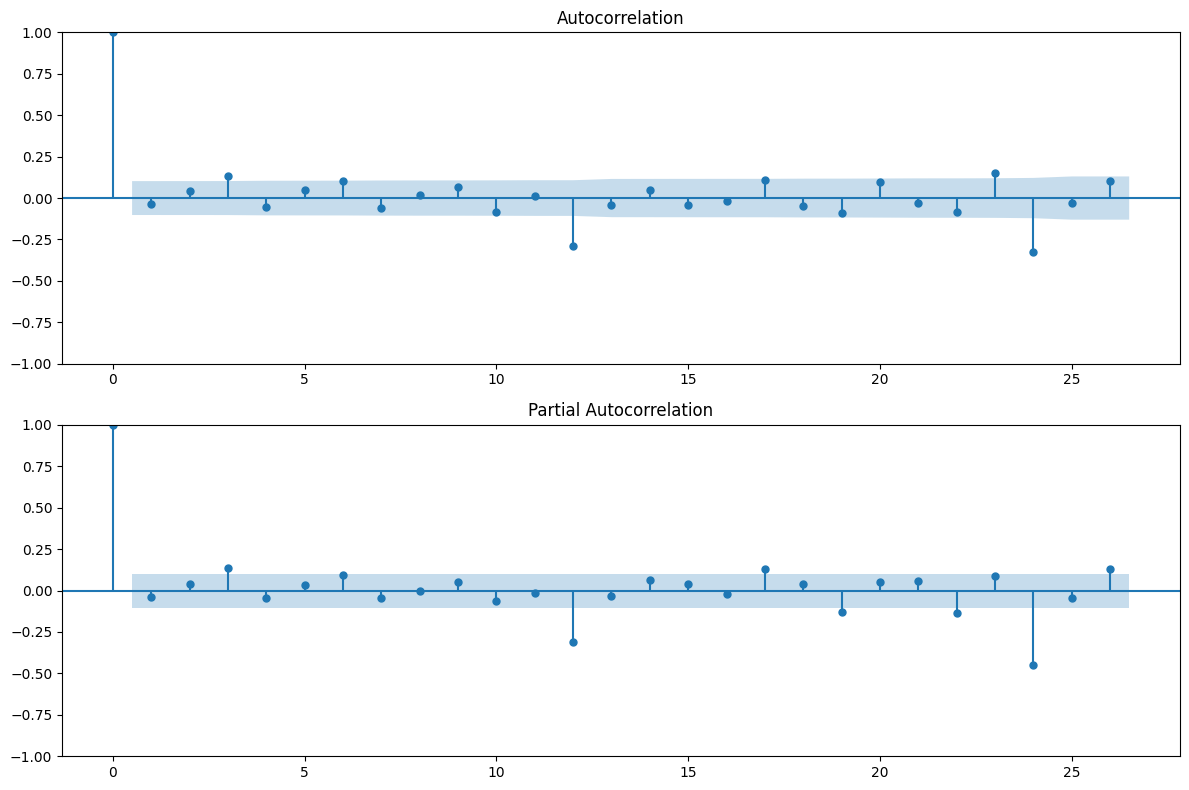

In [ ]:

residuals = results.resid

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)

plt.tight_layout()
plt.show()

De nuevo se observan autocorrelaciones estacionales. En este caso, se define Q = 1.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  367
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                 733.763
Date:                              Thu, 17 Oct 2024   AIC                          -1457.526
Time:                                      14:00:17   BIC                          -1438.165
Sample:                                  01-01-1994   HQIC                         -1449.823
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.549      0.583      -0.001       0.000
ar.L1          0.81

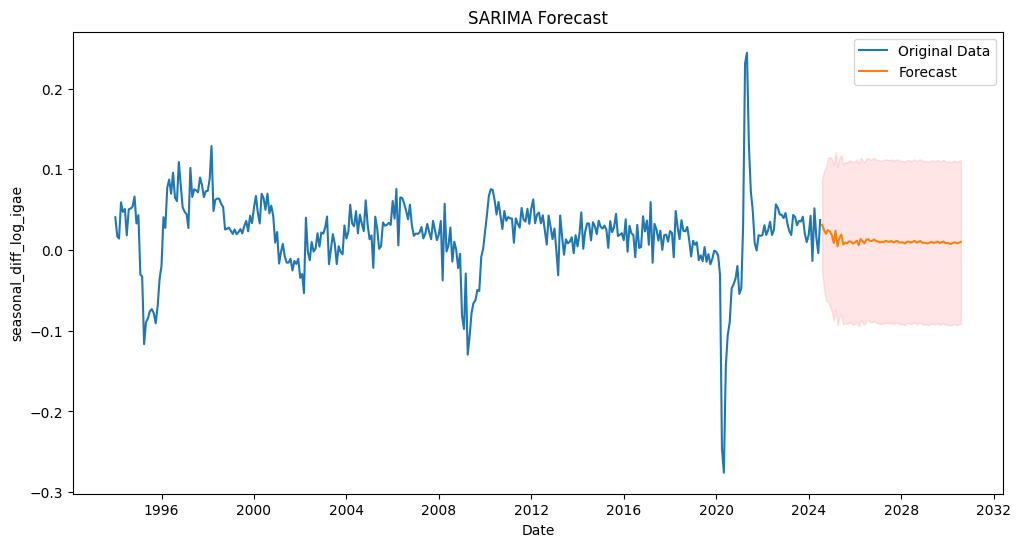

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order of the model (p, d, q) for AR, I, and MA components
# and seasonal order (P, D, Q, s) for seasonal AR, I, MA, and periodicity
order = (1, 0, 0)  # Example order
seasonal_order = (1, 1, 1, 12)  # Example seasonal order

# Create and fit the SARIMA model
model = SARIMAX(seasonal_diff_log_igae, order=order, seasonal_order=seasonal_order, trend="c")
results = model.fit(disp=0)
results_filter = model.filter(results.params)

# Print the model summary
print(results.summary())

forecast = results_filter.get_prediction(start=len(seasonal_diff_log_igae), end=len(seasonal_diff_log_igae)+72).summary_frame(alpha=0.05)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff_log_igae, label='Original Data')
plt.plot(forecast["mean"], label='Forecast')
plt.fill_between(
    forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'],
    color='r', alpha=0.1
)
plt.xlabel('Date')
plt.ylabel('seasonal_diff_log_igae')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

De nuevo se obtuvo una mejora del modelo. En este caso AIC = -1457.526

Se vuelven a observar los residuales.

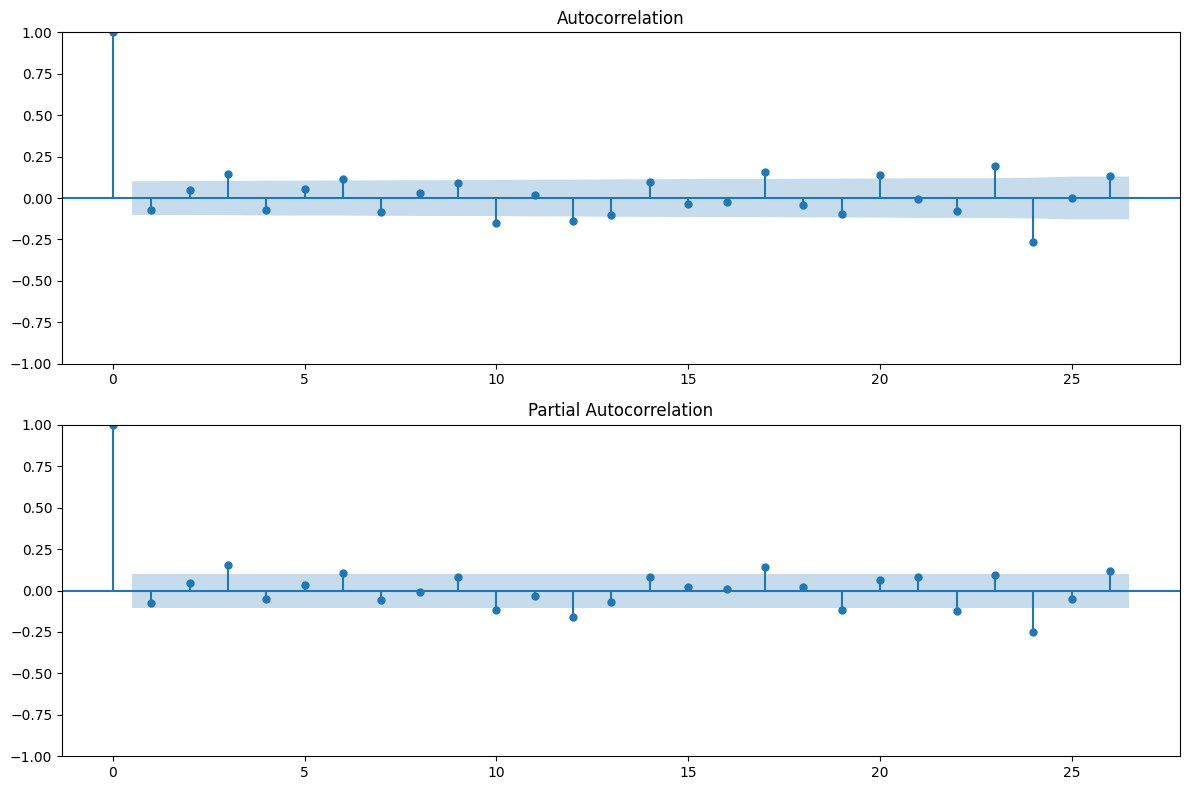

In [ ]:

residuals = results.resid

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)

plt.tight_layout()
plt.show()

Ahora se observa una correlación alta en el tercer mes. Esto se eliminará insertando un coeficiente q para tres valores anteriores. ([0,0,1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  367
Model:             SARIMAX(1, 0, [3])x(1, 1, 1, 12)   Log Likelihood                 737.785
Date:                              Thu, 17 Oct 2024   AIC                          -1463.570
Time:                                      14:00:23   BIC                          -1440.337
Sample:                                  01-01-1994   HQIC                         -1454.328
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.613      0.540      -0.001       0.000
ar.L1          0.78

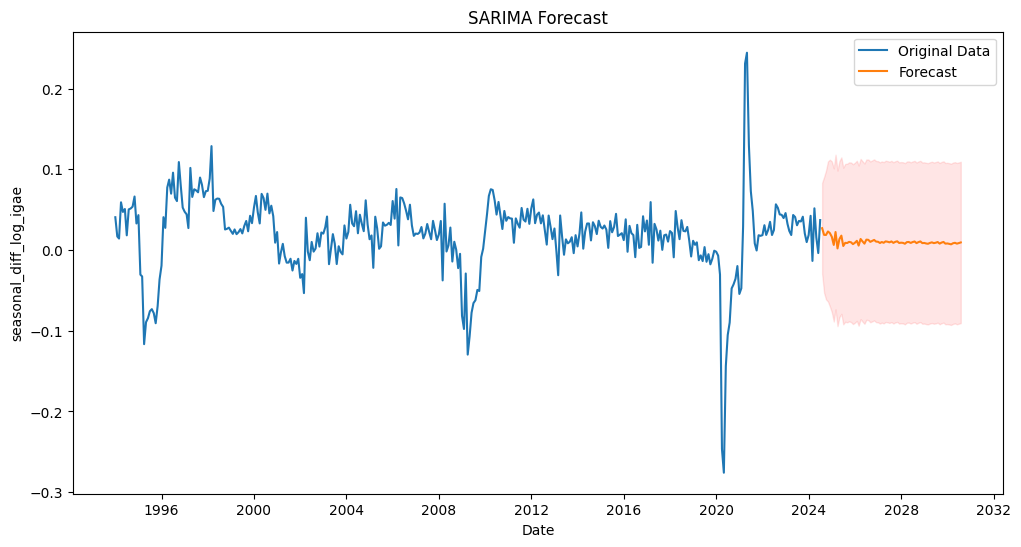

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order of the model (p, d, q) for AR, I, and MA components
# and seasonal order (P, D, Q, s) for seasonal AR, I, MA, and periodicity
order = (1, 0, [0,0,1])  # Example order
seasonal_order = (1, 1, 1, 12)  # Example seasonal order

# Create and fit the SARIMA model
model = SARIMAX(seasonal_diff_log_igae, order=order, seasonal_order=seasonal_order, trend="c")
results = model.fit(disp=0)
results_filter = model.filter(results.params)

# Print the model summary
print(results.summary())

forecast = results_filter.get_prediction(start=len(seasonal_diff_log_igae), end=len(seasonal_diff_log_igae)+72).summary_frame(alpha=0.05)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff_log_igae, label='Original Data')
plt.plot(forecast["mean"], label='Forecast')
plt.fill_between(
    forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'],
    color='r', alpha=0.1
)
plt.xlabel('Date')
plt.ylabel('seasonal_diff_log_igae')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

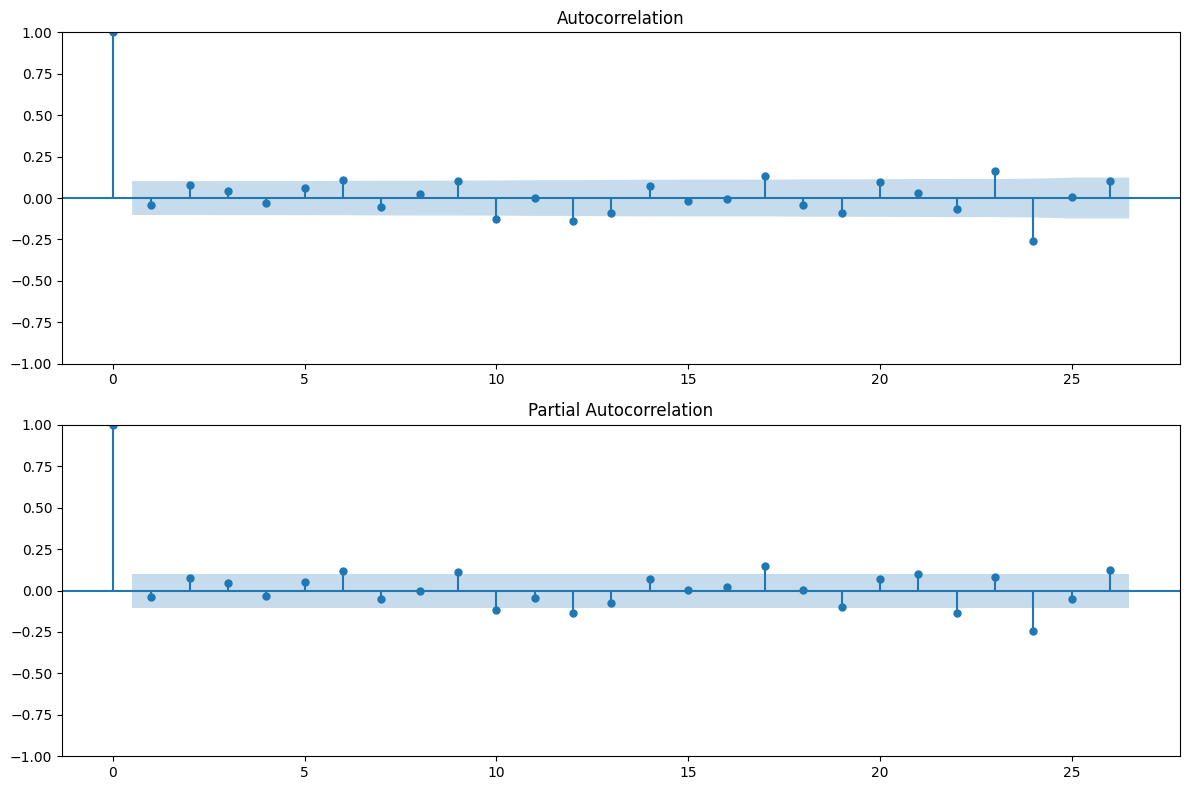

In [ ]:

residuals = results.resid

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(residuals, ax=ax1)
plot_pacf(residuals, ax=ax2)

plt.tight_layout()
plt.show()

La mayoría de los residuales se encuentran dentro del intervalo considerado como ruido blanco. Algunos puntos se encuentran fuera, pero tienen una magnitud pequeña, por lo que se puede considerar que el modelo está calibrado con éxito.

### Shock de crisis

Para mejorar aún más el modelo, se puede añadir una variable de crisis, con la cual podemos informar al modelo de crisis externas que afectaron el valor de la variable dependiente. Para ello, se insetaron valores de crisis en puntos de caída observados en la gráfica del IGAE.

In [ ]:
igae = igae.to_frame()
igae['crisis'] = 0

igae.loc[(igae.index.year == 1994) |
         (igae.index.year == 1995) |
         (igae.index.year == 2008) |
         (igae.index.year == 2020), 'crisis'] = 1

igae = igae.rename(columns={0: 'IGAE'})

igae = igae.dropna()

print(igae)

                  IGAE  crisis
1993-01-01   55.434736       0
1993-02-01   56.456971       0
1993-03-01   58.900549       0
1993-04-01   57.135844       0
1993-05-01   57.891853       0
...                ...     ...
2024-03-01  102.696013       0
2024-04-01  105.761270       0
2024-05-01  107.868081       0
2024-06-01  104.049350       0
2024-07-01  106.727192       0

[379 rows x 2 columns]


Utilizando esta variable, se vuelve a calcular en modelo. En este caso, la predicción se realiza añadiendo una crisis simulada desde el mes 25 al mes 30 siguientes.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  367
Model:             SARIMAX(1, 0, [3])x(1, 1, 1, 12)   Log Likelihood                 737.376
Date:                              Thu, 17 Oct 2024   AIC                          -1460.753
Time:                                      14:00:35   BIC                          -1433.648
Sample:                                  01-01-1994   HQIC                         -1449.970
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.628      0.530      -0.001       0.000
x1            -0.00

<ipython-input-75-9778282e3cde>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=seasonal_diff_log_igae.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')


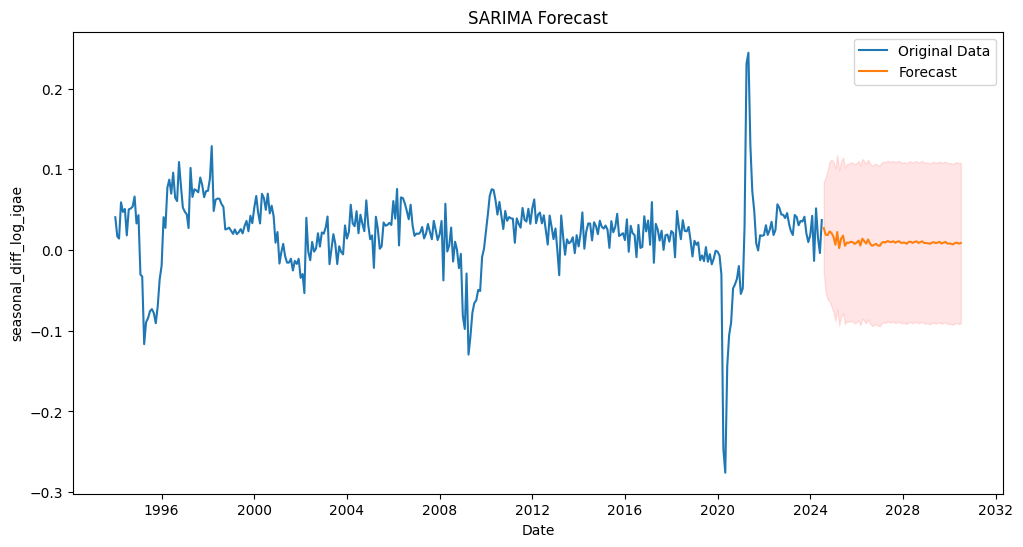

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order of the model (p, d, q) for AR, I, and MA components
# and seasonal order (P, D, Q, s) for seasonal AR, I, MA, and periodicity
order = (1, 0, [0,0,1])  # Example order
seasonal_order = (1, 1, 1, 12)  # Example seasonal order

shock = np.where((seasonal_diff_log_igae.index.year == 1994) |
                 (seasonal_diff_log_igae.index.year == 1995) |
                 (seasonal_diff_log_igae.index.year == 2008) |
                 (seasonal_diff_log_igae.index.year == 2020), 1, 0)

# Create and fit the SARIMA model
model = SARIMAX(seasonal_diff_log_igae,
                order=order,
                seasonal_order=seasonal_order,
                trend="c",
                exog=shock)
results = model.fit(disp=0)
results_filter = model.filter(results.params)

# Print the model summary
print(results.summary())

forecast_steps = 72
# All months are set to 0, except the 25th to 30th month where the shock occurs (set to 1)
shock_forecast = np.zeros(forecast_steps)
shock_forecast[24:30] = 1  # 25th to 30th month (Python index starts at 0)

# Convert to a DataFrame/Series and align with the forecast period
forecast_index = pd.date_range(start=seasonal_diff_log_igae.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
shock_forecast = pd.Series(shock_forecast, index=forecast_index)

# Get the forecast with the exogenous variable (shock) included
forecast = results_filter.get_prediction(start=len(seasonal_diff_log_igae),
                                                    end=len(seasonal_diff_log_igae) + forecast_steps - 1,
                                                    exog=shock_forecast).summary_frame(alpha=0.05)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff_log_igae, label='Original Data')
plt.plot(forecast["mean"], label='Forecast')
plt.fill_between(
    forecast.index, forecast['mean_ci_lower'], forecast['mean_ci_upper'],
    color='r', alpha=0.1
)
plt.xlabel('Date')
plt.ylabel('seasonal_diff_log_igae')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

Se puede observar que el valor de AIC es muy similar al anterior, sin embargo, en este caso es posible añadir crisis externas para medir su impacto.

### Análisis de coeficientes

*   intercept (-0.0002): Este término es cercano a cero y no es estadísticamente significativo (p=0.530), indicando que el intercepto no tiene un impacto importante.

*   x1 (-0.0050): El coeficiente de la variable externa (crisis) también es no significativo (p=0.693), por lo que no es significativa e indica que no tiene mucho impacto.

*   ar.L1 (0.7853): Es el coeficiente autorregresivo que relaciona el valor de y con el valor de y en el periodo (mes) anterior (AR(1)) es positivo y significativo (p<0.001), lo que indica que la serie depende de manera considerable del valor anterior.

*   ma.L3 (0.1188): El coeficiente de la relación con el error en 3 periodos anteriores (MA(3)) es positivo y significativo (p=0.031). Esto significa que el error en el tiempo t está correlacionado con los errores de tres periodos anteriores, aunque su magnitud es menor.

*   ar.S.L12 (-0.3225): Este es el coeficiente del término autorregresivo estacional de 12 períodos, significativo y negativo, lo que indica una relación inversa con los valores de la serie hace 12 meses.

*   ma.S.L12 (-0.9647): El de relación con errores anteriores estacional es cercano a -1 y altamente significativo. Esto indica que los errores estacionales están muy correlacionados con los errores de 12 períodos anteriores, con un peso considerable.

El modelo resultante se describe con la siguiente ecuación:
$ y_t = 0.7853 y_{t-1} + \epsilon_t + 0.1188 \epsilon_{t-3} - 0.3225 y_{t-12} - 0.9647 \epsilon_{t-12} $

Donde $y_t$ es el valor del IGAE en un periodo y $\epsilon_t$ es el shock de ese mismo periodo.

### Predicciones

Con el modelo final, se pueden realizar predicciones del valor de IGAE en los próximos 6 años

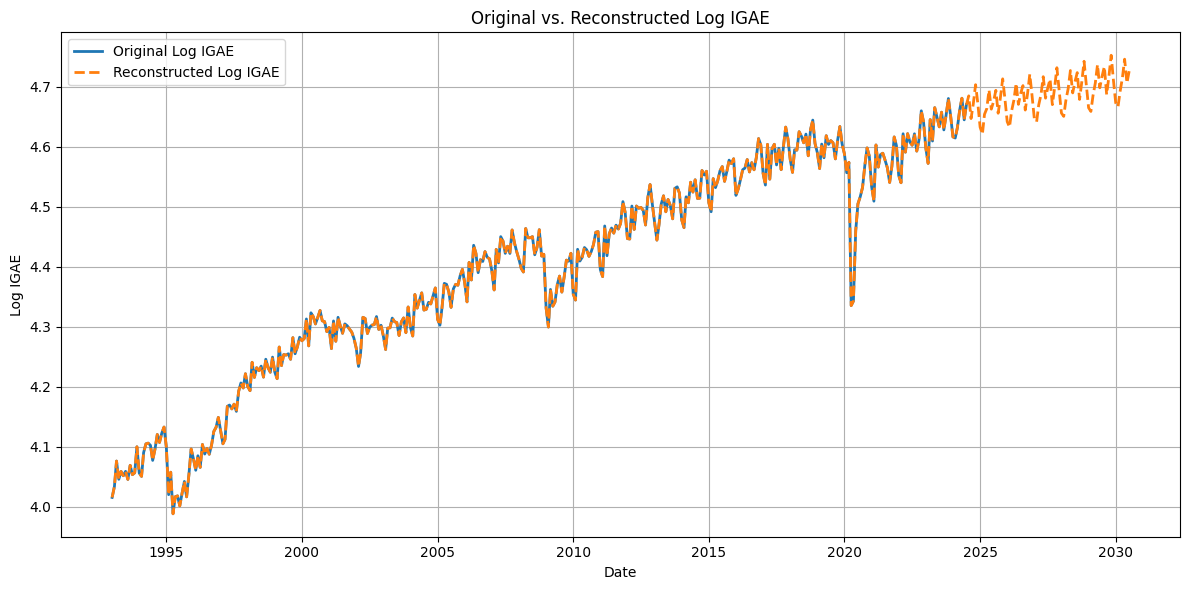

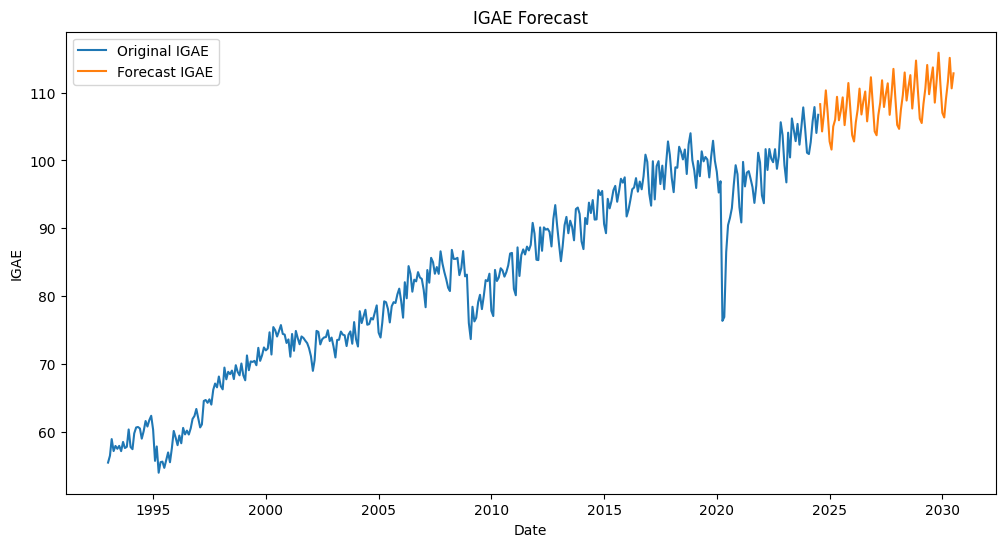

In [ ]:
# Get the forecast of the seasonal difference
forecast_seasonal_diff = forecast["mean"]

# Invert the seasonal difference to get the forecast of the log IGAE
complete_seasonal_diff = pd.concat([seasonal_diff_log_igae, forecast_seasonal_diff])


# Copy the original series
reconstructed_log_igae = igae_log.copy()

# Get the original frequency of the time series (e.g., monthly, daily, etc.)
freq = pd.infer_freq(igae_log.index)

# Extend the index by 72 more periods
new_dates = pd.date_range(start=igae_log.index[-1], periods=73, freq=freq)[1:]  # Add 72 new dates (ignore the first one)

# Extend the series with NaN values for the new dates
reconstructed_log_igae = reconstructed_log_igae.reindex(reconstructed_log_igae.index.union(new_dates))


# Iteratively reconstruct the values from t=12 onwards
for t in range(12, len(igae_log)+72):
    reconstructed_log_igae.iloc[t] = complete_seasonal_diff.iloc[t-12] + reconstructed_log_igae.iloc[t-12]

# Plot the reconstructed log IGAE and the original log IGAE
plt.figure(figsize=(12, 6))
plt.plot(igae_log, label='Original Log IGAE', linewidth=2)
plt.plot(reconstructed_log_igae, label='Reconstructed Log IGAE', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Log IGAE')
plt.title('Original vs. Reconstructed Log IGAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Exponentiate the log IGAE to get the forecast of the original IGAE
forecast_igae = np.exp(reconstructed_log_igae)

# Plot the forecast of the original IGAE
plt.figure(figsize=(12, 6))
plt.plot(igae['IGAE'], label='Original IGAE')
plt.plot(forecast_igae[-len(forecast_seasonal_diff):], label='Forecast IGAE')
plt.xlabel('Date')
plt.ylabel('IGAE')
plt.title('IGAE Forecast')
plt.legend()
plt.show()


La predicción muestra un claro patrón estacional. Se muestra la media de las predicciones, las cuales pueden variar como se muestra en la gráfica de predicción de la diferencia estacional del logaritmo.

Finalmente, se puede calcular el CAGR, la tasa de crecimiento anual compuesta.

In [ ]:

# Get the last available actual value of igae
initial_value = igae['IGAE'].iloc[-1]

# Get the forecasted value for the last month of the 6-year period
final_value = forecast_igae.iloc[-1]

# Calculate the CAGR
number_of_years = 6
cagr = ( (final_value / initial_value) ** (1 / number_of_years) ) - 1

print("CAGR for the next 6 years:", cagr)

CAGR for the next 6 years: 0.009329883548844231


El IGAE tiene una tasa de crecimiento anual compuesta positiva, lo que significa que va a aumentar su magnitud en el futuro, pero en pocos puntos.

### Conclusion

El modelo propuesto sigue un patrón similar al observado en años pasados en el IGAE. Los coeficientes indican que el valor del IGAE está fuertemente relacionado con el valor del IGAE en el periodo pasado y con el shock de 12 meses atrás. El modelo es adecuado para dar una predicción a grandes rasgos del valor futuro del IGAE.